# Math 20: Probability

## About

> ### probability distributions

> ### python graph gallery

> ### reproducible python code

> ### 4 main data analysis and math tools: 
> * Numpy
> * Pandas
> * Math
> * Scipy

> ### 3 main ploting tools: 
> * Matplotlib
> * Seaborn
> * Plotly

## Progress

- [x] 0629
- [x] 0701
- [x] 0706
- [x] 0708
- [x] quiz 4
- [x] 0710

#### The notebook will be updated irregularly.
#### `Last updated: July 10`

### import packages and modules

In [69]:
import numpy as np
import pandas as pd
import math 
import random
from scipy.special import comb # combination
from scipy.stats import expon # exponential distribution
from scipy.stats import multivariate_normal # multivariate normal distribution
from scipy.stats import pearsonr
from scipy.stats import uniform # uniform distribution
from scipy.stats import norm # normal distribution

from scipy import signal


import itertools
import collections

import yfinance as yf

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
from matplotlib.colors import rgb2hex
from matplotlib import cm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D

from datetime import timedelta  
import datetime

import seaborn as sns; sns.set()

import plotly.figure_factory as ff 
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo

from IPython.display import Math

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Compress warnings: everyone will be tired of warnings at this stage...
import warnings
warnings.filterwarnings("ignore", message="This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.")
warnings.filterwarnings("ignore", message="JointGrid annotation is deprecated and will be removed in a future release.")

### Where to save the dataframes and figures

In [17]:
_Data_PATH_ = './data/'
_Figure_PATH_ = './figures/'

### Colors

In [18]:
armyrose = ['#798234', '#a3ad62', '#d0d3a2', '#fdfbe4', '#f0c6c3', '#df91a3', '#d46780']
tealrose = ['#009392', '#72aaa1', '#b1c7b3', '#f1eac8', '#e5b9ad', '#d98994', '#d0587e']
geyser = ['#008080', '#70a494', '#b4c8a8', '#f6edbd', '#edbb8a', '#de8a5a', '#ca562c']
earth = ['#A16928', '#bd925a', '#d6bd8d', '#edeac2', '#b5c8b8', '#79a7ac', '#2887a1']
earth.reverse()
fall = ['#3d5941', '#778868', '#b5b991', '#f6edbd', '#edbb8a', '#de8a5a', '#ca562c']

# hex color code to rgb color code
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    rgb_int = tuple(int(value[i:i+lv//3], 16) for i in range(0, lv, lv//3))
    rgb_str = 'rgb(' + str(rgb_int[0]) + ',' + str(rgb_int[1]) + ',' + str(rgb_int[2]) + ')'
    return rgb_str

### Slides 0629

* #### How Much Does a Hershey Kiss Weight?
```python
def figure_hershey_dist(n, fsize, fs)
```

In [19]:
def figure_hershey_dist(n, fsize, fs):
    '''
    n: number of hershey kisses in the sample
    fsize: figure size
    fs: font size
    '''
    mu = 0.16 # a single standard Hershey's Kiss weighs 0.16 ounces.
    sigma = 0.01 # assume that the standard deviation is 0.01
    
    normal_array = np.round(np.random.normal(mu, sigma, n), 4)
    
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    sns.distplot(normal_array, hist = True, kde = True, # plot both the histogram and the density function
                 bins=int(50), color = '#514843', hist_kws={'edgecolor':'white'}, kde_kws={'linewidth': 4})
    title_dict = {'1000': '1k', '10000': '10k', '100000': '100k', '1000000': '1m', '1000000000': '1b'}
    ax.set_xlabel(r'$X$', fontsize = fs - 2)
    ax.set_ylabel('Frequency (Density)', fontsize = fs - 2)
    plt.xticks(fontsize = fs - 4)
    plt.yticks(fontsize = fs - 4)
    fig.suptitle(title_dict[str(n)] + ' pieces', fontsize = fs, y = 0.94)
    #fig.savefig(_Figure_PATH_ + 'hershey_distribution_' + title_dict[str(n)] + '.png', dpi = 400)

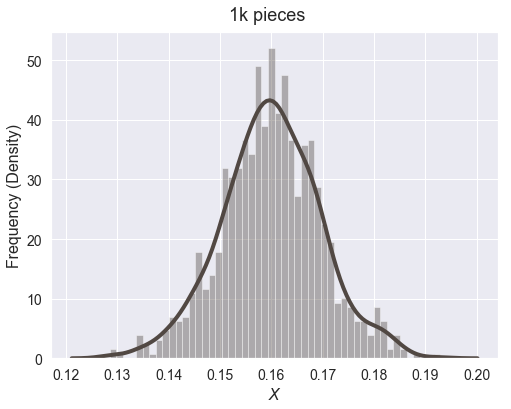

In [196]:
figure_hershey_dist(int(1e3), (8, 6), 18)
#figure_hershey_dist(int(1e4), (8, 6), 18)
#figure_hershey_dist(int(1e5), (8, 6), 18)

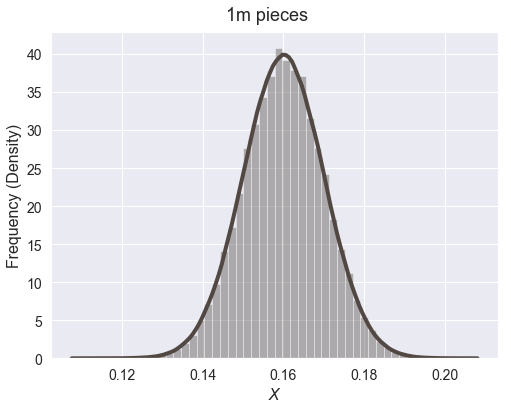

In [197]:
figure_hershey_dist(int(1e6), (8, 6), 18)
#figure_hershey_dist(int(1e12), (6, 4), 15)

### Slides 0701

* #### US States 
```python
def us_map_html(dict_state, target, title = None, country = 'US', cmap = tealrose)
def us_map_png(dict_state, target, title = None, country = 'US', cmap = tealrose)
```
* #### Histograms of Discrete Probability Distributions
```python
def figure_discrete_hist(job = 'dice', fsize = (8, 6), fs = 20)
```
* #### Riemann Sum of a Function
```python
def figure_riemann_sum(job = 'power', fsize = (8, 6), fs = 20)
```
* #### Exponential Distribution: Density Function and Cumulative Distribution Function
```python
figure_exp_dist(job = 'pdf', fsize = (8, 6), fs = 18)
```

In [141]:
# State names
names_state = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 
                 'District of Columbia',
                 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 
                 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
                 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
                 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
                 'Wisconsin', 'Wyoming']

# The abbreviations of state names
names_state_short_dict = {
    'Alabama': 'AL', 'Alaska':'AK', 'Arizona':'AZ', 'Arkansas':'AR', 'California':'CA', 'Colorado':'CO', 'Connecticut':'CT', 'Delaware':'DE', 
    'Florida':'FL', 'Georgia':'GA', 'Hawaii':'HI', 'Idaho':'ID', 'Illinois':'IL', 'Indiana':'IN', 'Iowa':'IA', 'Kansas':'KS', 
    'Kentucky':'KY', 'Louisiana':'LA', 'Maine':'ME', 'Maryland':'MD', 'Massachusetts':'MA', 'Michigan':'MI', 'Minnesota':'MN', 'Mississippi':'MS',
    'Missouri':'MO', 'Montana':'MT', 'Nebraska':'NE', 'Nevada':'NV', 'New Hampshire':'NH', 'New Jersey':'NJ', 'New Mexico':'NM', 'New York':'NY',
    'North Carolina':'NC', 'North Dakota':'ND', 'Ohio':'OH', 'Oklahoma':'OK', 'Oregon':'OR', 'Pennsylvania':'PA', 'Rhode Island':'RI', 'South Carolina':'SC',
    'South Dakota':'SD', 'Tennessee':'TN', 'Texas':'TX', 'Utah':'UT', 'Vermont':'VT', 'Virginia':'VA', 'Washington':'WA', 'West Virginia':'WV',
    'Wisconsin':'WI', 'Wyoming':'WY', 
    'District of Columbia': 'DC', 'Guam': 'Guam', 'Northern Mariana Islands':'Northern Mariana Islands',
    'Puerto Rico': 'PR', 'Virgin Islands': 'VI'}

# data source: wikipedia
# https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population
# https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_area

# State populations
state_population_dict = {
    'Alabama': 4903185, 'Alaska':731545, 'Arizona':7278717, 'Arkansas':3017825, 
    'California':39512223, 'Colorado':5758736, 'Connecticut':3565287, 'Delaware':973764, 
    'Florida':21477737, 'Georgia':10617423, 'Hawaii':1415872, 'Idaho':1787065, 
    'Illinois':12671821, 'Indiana':6732219, 'Iowa':3155070, 'Kansas':2913314, 
    'Kentucky':4467673, 'Louisiana':4648794, 'Maine':1344212, 'Maryland':6045680, 
    'Massachusetts':6949503, 'Michigan':9986857, 'Minnesota':5639632, 'Mississippi':2976149,
    'Missouri':6137428, 'Montana':1068778, 'Nebraska':1934408, 'Nevada':3080156, 
    'New Hampshire':1359711, 'New Jersey':8882190, 'New Mexico':2096829, 'New York':19453561,
    'North Carolina':10488084, 'North Dakota':762062, 'Ohio':11689100, 'Oklahoma':3956971, 
    'Oregon':4217737, 'Pennsylvania':12801989, 'Rhode Island':1059361, 'South Carolina':5148714,
    'South Dakota':884659, 'Tennessee':6833174, 'Texas':28995881, 'Utah':3205958, 
    'Vermont':623989, 'Virginia':8535519, 'Washington':7614893, 'West Virginia':1792147,
    'Wisconsin':5822434, 'Wyoming':578759, 'District of Columbia': 705749, 'Guam': 165718, 
    'Puerto Rico':3193694, 'Virgin Islands': 104914}

# State areas (land, unit: sq mi)
state_size_dict = {
    'Alabama':50645.33, 'Alaska':570640.95, 'Arizona':113594.08, 'Arkansas':52035.48, 
    'California':155779.22, 'Colorado':103641.89, 'Connecticut':4842.36, 'Delaware':1948.54, 
    'Florida':53624.76, 'Georgia':57513.49, 'Hawaii':6422.63, 'Idaho':82643.12, 
    'Illinois':55518.93, 'Indiana':35826.11, 'Iowa':55857.13, 'Kansas':81758.72, 
    'Kentucky':39486.34, 'Louisiana':43203.90, 'Maine':30842.92, 'Maryland':9707.24, 
    'Massachusetts':7800.06, 'Michigan':56538.90, 'Minnesota':79626.74, 'Mississippi':46923.27,
    'Missouri':68741.52, 'Montana':145545.80, 'Nebraska':76824.17, 'Nevada':109781.18, 
    'New Hampshire':8952.65, 'New Jersey':7354.22, 'New Mexico':121298.15, 'New York':47126.40,
    'North Carolina':48617.91, 'North Dakota':69000.80, 'Ohio':40860.69, 'Oklahoma':68594.92, 
    'Oregon':95988.01, 'Pennsylvania':44742.70, 'Rhode Island':1033.81, 'South Carolina':30060.70,
    'South Dakota':75811.00, 'Tennessee':41234.90, 'Texas':261231.71, 'Utah':82169.62, 
    'Vermont':9216.66, 'Virginia':39490.09, 'Washington':66455.52, 'West Virginia':24038.21,
    'Wisconsin':54157.80, 'Wyoming':97093.14, 'District of Columbia': 61.05, 'Guam': 209.80, 
    'Puerto Rico':3423.78, 'Virgin Islands': 134.32}

In [199]:
# Save as html files
def us_map_html(dict_state, target, title = None, country = 'US', cmap = tealrose):
    '''
    dict_state: data set
    target: census or area
    title: title of the figure
    cmap: color map
    '''
    locations = [names_state_short_dict[name] for name in names_state]
    values = [dict_state[name] for name in names_state]
    if target == 'population':
        values = [item/1e6 for item in values]
    c_title_dict = {'population': 'unit: million', 'area': 'unit: sq mi'}
    fig = go.Figure(data = go.Choropleth(
        locations = locations, # spatial coordinates
        z = values, # data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale=[[0, hex_to_rgb(cmap[0])],
                [0.05, hex_to_rgb(cmap[1])],
                [0.1, hex_to_rgb(cmap[2])],
                [0.15, hex_to_rgb(cmap[3])],
                [0.2, hex_to_rgb(cmap[4])],
                [0.25, hex_to_rgb(cmap[5])],
                [1, hex_to_rgb(cmap[6])]],
        marker_line_color = 'white',
        colorbar_title = c_title_dict[target],
        colorbar = dict(
        thickness = 15,
        len = 0.8,
        yanchor = "top", 
        x = 0.95,
        y = 0.9,),
        hoverinfo = 'location+text',
        text = values,
    ))

    fig.update_layout(
        title_text = title,
        title = dict(x = 0.5, y = 0.85),
        width = 450, 
        height = 300,
        font = dict(
        size = 10,),
        margin = dict(l = 10, r = 10, t = 50, b = 10),
        geo = dict(
            scope = 'usa',
            projection = go.layout.geo.Projection(type = 'albers usa'),
            showlakes = True, # lakes
            lakecolor='rgb(255, 255, 255)'),
    )
    #fig.show()
    #fig.write_html(_Figure_PATH_  + country + '_map_' + target + '.html')
    return fig

In [200]:
pyo.init_notebook_mode() # work in offline mode
fig = us_map_html(state_population_dict, 'population', title = 'US: states by census', country = 'US', cmap = tealrose)
fig.show()

In [201]:
fig = us_map_html(state_size_dict, 'area', title = 'US: states by area', country = 'US', cmap = geyser)

In [202]:
# Save as png files
def us_map_png(dict_state, target, title = None, country = 'US', cmap = tealrose):
    '''
    dict_state: data set
    target: census or area
    title: title of the figure
    cmap: color map
    '''
    locations = [names_state_short_dict[name] for name in names_state]
    values = [dict_state[name] for name in names_state]
    # Calculate the probability of 
    # the resident lives in New Hampshire and that of the coin fall to New Hampshire
    print(round(dict_state['New Hampshire']*100/np.sum(values), 2))
    if target == 'population':
        values = [item/1e6 for item in values]
    c_title_dict = {'population': 'unit: million', 'area': 'unit: sq mi'}
    fig = go.Figure(data = go.Choropleth(
        locations = locations, # spatial coordinates
        z = values, # data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale=[[0, hex_to_rgb(cmap[0])],
                [0.05, hex_to_rgb(cmap[1])],
                [0.1, hex_to_rgb(cmap[2])],
                [0.15, hex_to_rgb(cmap[3])],
                [0.2, hex_to_rgb(cmap[4])],
                [0.25, hex_to_rgb(cmap[5])],
                [1, hex_to_rgb(cmap[6])]],
        marker_line_color = 'white',
        colorbar_title = c_title_dict[target],
        colorbar = dict(
        thickness = 40),
        hoverinfo = 'location+text',
        text = values,
    ))
    
    fig.update_layout(
        title_text = title,
        title = dict(x = 0.5, y = 0.95),
        width = 1800, 
        height = 1050,
        font = dict(
        size = 40,),
        geo = dict(
            scope = 'usa',
            projection = go.layout.geo.Projection(type = 'albers usa'),
            showlakes = True, # lakes
            lakecolor='rgb(255, 255, 255)'),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        
    )
    fig.update_layout(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
    )
    #fig.write_image(_Figure_PATH_ + country +'_map_' + target +  '.png')
    return fig

In [203]:
# The two probabilities are printed (unit: %)
fig = us_map_png(state_size_dict, 'area', title = 'US: states by area', country = 'US', cmap = geyser)
fig = us_map_png(state_population_dict, 'population', title = 'US: states by census', country = 'US', cmap = tealrose)

0.25
0.41


In [205]:
# Histograms of discrete probability distributions
def figure_discrete_hist(job = 'dice', fsize = (8, 6), fs = 20):
    '''
    job: coin, dice, bino, poisson, bino_1, bino_2, bino_5, or bino_10
    fsize: figure size
    fs: font size
    '''
    # Probability distribution function of binomial distribution
    def binomial(n, p, k): 
        return comb(n, k)*np.power(p, k)*np.power(1-p, n-k)
    # Probability distribution function of Poisson distribution
    def poisson(lam, k): 
        return np.power(lam, k)*np.power(np.e, -lam)/math.factorial(k)
    
    palette = tealrose # color map for the plotting
    
    # Toss a coin
    if job == 'coin':
        height = [1/2]*2
        bars = ('Head', 'Tail')
    # Roll a dice
    elif job == 'dice': 
        height = [1/6]*6
        bars = ('1', '2', '3', '4', '5', '6')
    # Binomial distribution with parameters n = 10 and p = 0.5
    elif job == 'bino':
        x = range(0, 11)
        height = [binomial(10, 0.5, k) for k in x]
        bars = [str(k) for k in x]
        palette = [item for item in palette for i in range(2)]
    # Poisson distribution with parameter lambda = 5
    elif job == 'poisson':
        x = range(0, 21) # x is truncated to 20
        height = [poisson(5, k) for k in x]
        bars = [str(k) for k in x]
        palette = [item for item in palette for i in range(3)]
    
    # Gradually fining the outcome numbers
    elif 'bino_' in job:
        step = int(job[5:]) # d omega = 1, 0.5, 0.2 or 0.1
        x = np.linspace(0, 10, step*10+1)
        # If d omega = 1, it is a binomial distribution with parameters n = 10 and p = 0.4
        height = [binomial(10, 0.4, k) for k in x] 
        bars = [str(k) for k in x]
        palette = [item for item in palette for i in range(int(np.ceil(len(bars)/6)))]
        
    y_pos = np.arange(len(bars))
    
    
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    # Histogram
    ax.bar(y_pos, height, color = palette[:len(bars)], edgecolor = "none")
    if 'bino_' in job:
        step = int(job[5:])
        ticks = bars[::step].copy()
        ticks = [int(np.float(k)) for k in ticks]
        plt.xticks(y_pos[::step], ticks)
    else:
        plt.xticks(y_pos, bars)
    plt.xticks(fontsize = fs - 4)
    plt.yticks(fontsize = fs - 4)
    ax.set_xlabel(r'$\omega$', fontsize = fs - 2)
    ax.set_ylabel(r'$m(\omega)$', fontsize = fs - 2)
    title_dict = {'coin': 'Toss a coin', 'dice': 'Roll a dice', 
                  'bino': 'Binomial distribution with ' + r'$n = 10, p = 0.5$',
                  'poisson': 'Poisson distribution with ' + r'$\lambda = 5$',
                  'bino_1': r'$d\omega = 1$',
                  'bino_2': r'$d\omega = 0.5$',
                  'bino_5': r'$d\omega = 0.2$',
                  'bino_10': r'$d\omega = 0.1$'}
   
    fig.suptitle(title_dict[job], fontsize = fs, y = 0.95)
    #fig.savefig(_Figure_PATH_ + 'hist_' + job + '.png', dpi = 400, bbox_inches='tight')
    plt.show()
    return fig


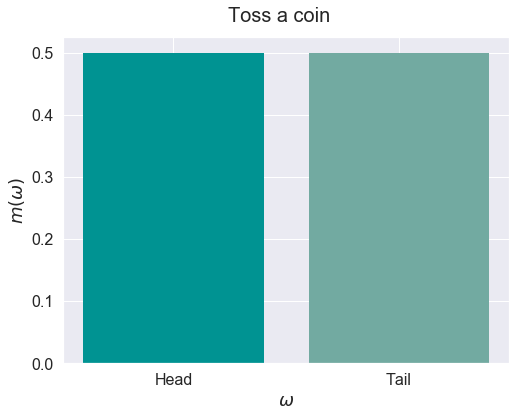

In [206]:
fig = figure_discrete_hist(job = 'coin')

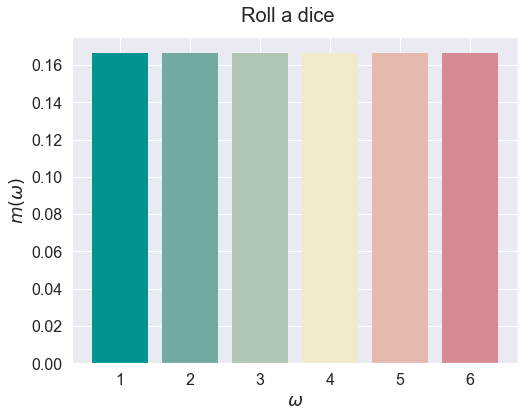

In [207]:
fig = figure_discrete_hist(job = 'dice')

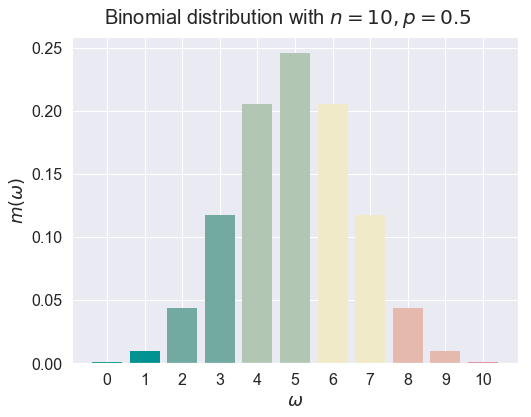

In [208]:
fig = figure_discrete_hist(job = 'bino')

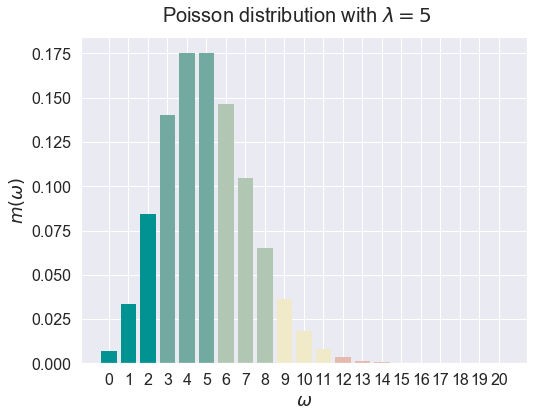

In [209]:
fig = figure_discrete_hist(job = 'poisson')

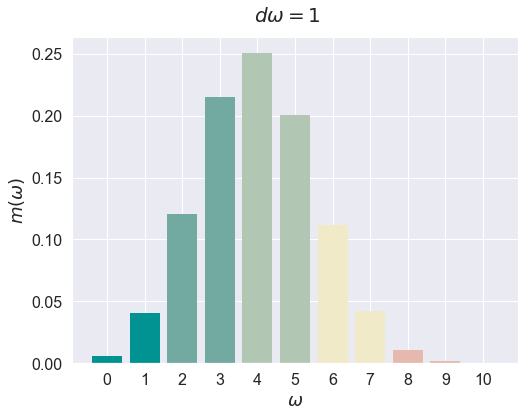

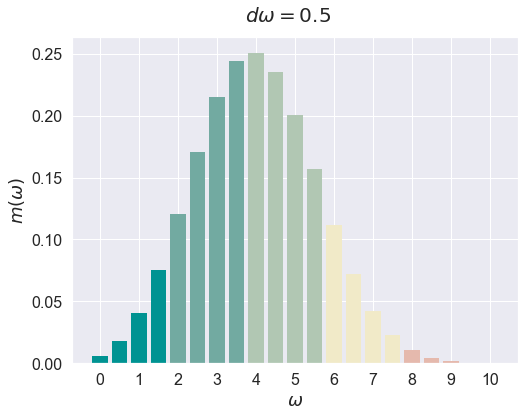

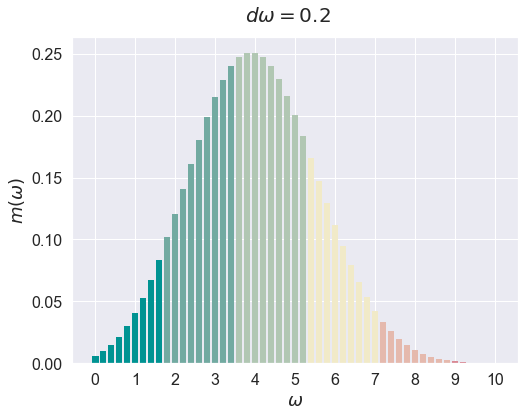

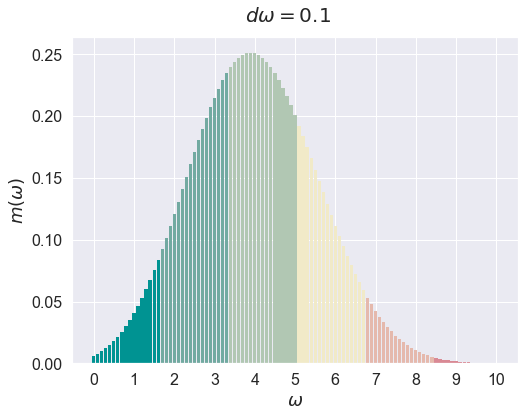

In [210]:
# d omega = 1
fig = figure_discrete_hist(job = 'bino_1')
# d omega = 0.5
fig = figure_discrete_hist(job = 'bino_2')
# d omega = 0.2
fig = figure_discrete_hist(job = 'bino_5')
# d omega = 0.1
fig = figure_discrete_hist(job = 'bino_10')

In [214]:
def figure_riemann_sum(job = 'power', fsize = (8, 6), fs = 20):
    '''
    job: power function or absolute value of sin function
    fsize: figure size
    fs: font size
    '''
    # Power function: y = x^2
    def power(k):
        return k**2
    # Absolute value of sin function: y = |sin(pi*x)|
    def abssin(k):
        return np.abs(np.sin(np.pi*k))
    
    palette = tealrose # colormap
    palette = [item for item in palette for i in range(5)]
    
    x_bars = np.linspace(0, 1, 31)
    bars = [str(k) for k in x_bars] 
    x = np.linspace(0, 1, 101)
        
    if job == 'power':
        height = [power(k) for k in x_bars]
        y = [power(k) for k in x]

    elif job == 'sin':
        height = [abssin(k) for k in x_bars]
        y = [abssin(k) for k in x]

    y_pos = np.arange(len(bars))
    width = [1]*len(bars)
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    # Histogram
    ax.bar(y_pos, height, color = palette[:len(bars)], width = width)
    ax.plot(x*(len(bars)-1), y, color = tealrose[1], linewidth = 3)
    step = 3
    ticks = bars[::step].copy()
    ticks = [round(np.float(k),1) for k in ticks]
    plt.xticks(y_pos[::step], ticks)
    plt.xticks(fontsize = fs - 4)
    plt.yticks(fontsize = fs - 4)
    ax.set_xlabel(r'$x$', fontsize = fs - 2)
    ax.set_ylabel(r'$f(x)$', fontsize = fs - 2)
    title_dict = {'power': r'$x^2$', 'sin': r'$|\sin(\pi x)|$', }
    fig.suptitle(title_dict[job], fontsize = fs, y = 0.95)
    
    #fig.savefig(_Figure_PATH_ + 'riemann_sum_' + job + '.png', dpi = 400, bbox_inches='tight')
    plt.show()
    return fig

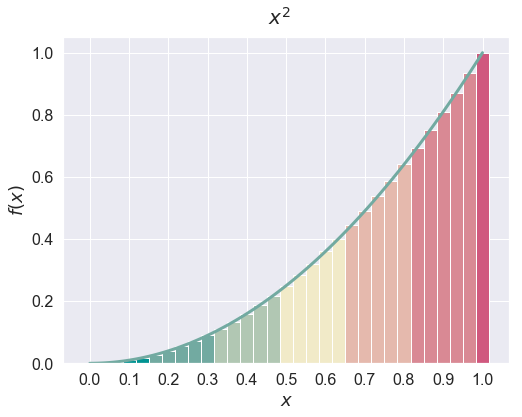

In [215]:
fig = figure_riemann_sum(job = 'power', fsize = (8, 6), fs = 20)

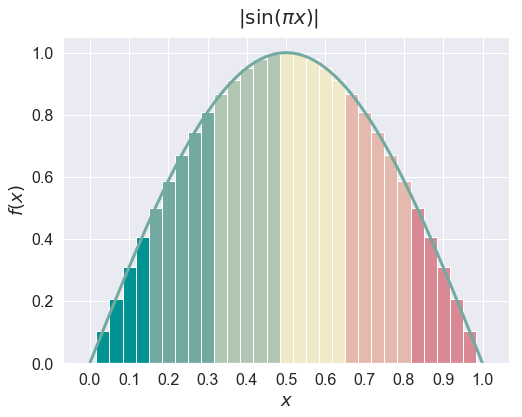

In [216]:
fig = figure_riemann_sum(job = 'sin', fsize = (8, 6), fs = 20)

In [220]:
# Exponential distribution: density function and cumulative distribution function
def figure_exp_dist(job = 'pdf', fsize = (8, 6), fs = 18):
    '''
    job: pdf (density function) or cdf (cumulative distribution function)
    fsize: figure size
    fs: font size
    '''
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    for s in [0.5, 1, 2]:
        x = np.linspace(0, 6, 101) # x is truncated to 20
        if job == 'pdf':
            ax.plot(x, expon.pdf(x, scale = s), lw = 3, alpha = 0.8, label = r'$\lambda = $' + str(1/s))
        else:
            ax.plot(x, expon.cdf(x, scale = s), lw = 3, alpha = 0.8, label = r'$\lambda = $' + str(1/s))
            
    ax.set_xlabel(r'$x$', fontsize = fs - 2)
    ax.set_ylabel(r'$f(x)$', fontsize = fs - 2)
    plt.xticks(fontsize = fs - 4)
    plt.yticks(fontsize = fs - 4)
    ax.legend(loc='upper right', fancybox=True, ncol = 1, fontsize = fs - 4)
    title_dict = {'pdf': 'Density function', 'cdf': 'Cumulative distribution function'}
    fig.suptitle(title_dict[job], fontsize = fs, y = 0.95)
    #fig.savefig(_Figure_PATH_ + 'exp_' + job + '.png', dpi = 400, bbox_inches='tight')
    plt.show()
    return fig

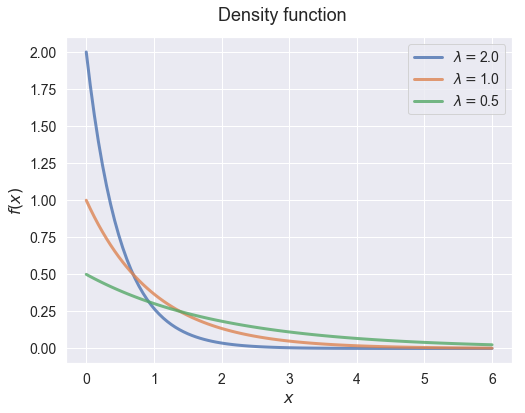

In [221]:
fig = figure_exp_dist('pdf')

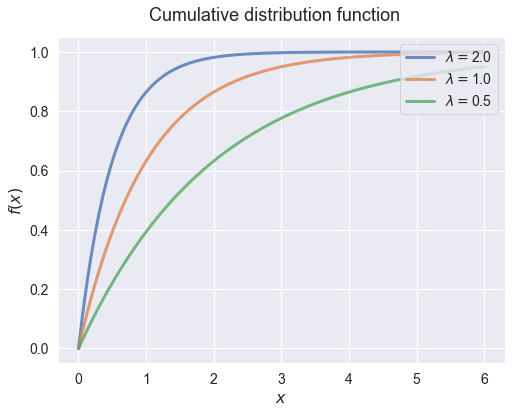

In [222]:
fig = figure_exp_dist('cdf')

### Slides 0706

* #### $n!$ and Stirling's Formula
```python
stirling(n = 10)
figure_stirling(n = 5, fsize = (8, 6), fs = 18)
```

* #### Hat Check Problem (Fixed Point)
```python
hat_check(n = 10)
figure_hat_check(n = 15, fsize = (12, 6), fs = 20)
```

In [182]:
# Compare n! and the Stirling's formula
def stirling(n):
    '''
    n: a positive integer
    '''
    factorial = math.factorial(n)
    est = np.power(n, n)*np.exp(-n)*np.sqrt(2*np.pi*n)
    return factorial, round(est, 4), round(est/factorial, 4), round(factorial - est, 4)

In [183]:
for n in range(1, 11):
    print(stirling(n))

(1, 0.9221, 0.9221, 0.0779)
(2, 1.919, 0.9595, 0.081)
(6, 5.8362, 0.9727, 0.1638)
(24, 23.5062, 0.9794, 0.4938)
(120, 118.0192, 0.9835, 1.9808)
(720, 710.0782, 0.9862, 9.9218)
(5040, 4980.3958, 0.9882, 59.6042)
(40320, 39902.3955, 0.9896, 417.6045)
(362880, 359536.8728, 0.9908, 3343.1272)
(3628800, 3598695.6187, 0.9917, 30104.3813)


In [193]:
def figure_stirling(n, fsize, fs):
    '''
    n: a positive integer
    fsize: figure size
    fs: font size
    '''
    sns.set()
    palette = tealrose
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    x = range(1, n+1)
    y_factorial = [stirling(k)[0] for k in x]
    y_stirling = [stirling(k)[1] for k in x]
    ax.plot(x, y_factorial, linewidth = 3, color = palette[-3], label = 'factorial')
    ax.scatter(x, y_stirling, s = 100, color = palette[-2], label = 'stirling')
    ax.set_xlabel(r'$n$', fontsize = fs - 2)
    ax.set_ylabel(r'$n!$' + ' or ' + r'$n^ne^{-n}\sqrt{2\pi n}$', fontsize = fs - 2)
    plt.xticks(fontsize = fs - 4)
    plt.yticks(fontsize = fs - 4)
    ax.legend(loc='upper right', fancybox=True, ncol = 1, fontsize = fs - 4)
    fig.suptitle(r'$n$ ' + "factorial and Stirling's formula", fontsize = fs, y = 0.95)
    fig.savefig(_Figure_PATH_ + 'stirling.png', dpi = 400, bbox_inches='tight')
    
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    x = range(1, n+1)
    y_ratio = [stirling(k)[2] for k in x]
    ax.plot(x, y_ratio, marker = 'o', ms = 10, linewidth = 3, color = palette[-2])
    ax.set_xlabel(r'$n$', fontsize = fs - 2)
    ax.set_ylabel(r'$\frac{n^ne^{-n}\sqrt{2\pi n}}{n!}$', fontsize = fs - 2)
    plt.xticks(fontsize = fs - 4)
    plt.yticks(fontsize = fs - 4)
    fig.suptitle('Ratio of ' + r'$n$ ' + "factorial and Stirling's formula", fontsize = fs, y = 0.95)
    fig.savefig(_Figure_PATH_ + 'stirling_ratio.png', dpi = 400, bbox_inches='tight')
    
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    x = range(1, n+1)
    y_diff = [stirling(k)[3] for k in x]
    ax.plot(x, y_diff, marker = 'o', ms = 10, linewidth = 3, color = palette[1])
    ax.set_xlabel(r'$n$', fontsize = fs - 2)
    ax.set_ylabel(r'$n! - n^ne^{-n}\sqrt{2\pi n}$', fontsize = fs - 2)
    plt.xticks(fontsize = fs - 4)
    plt.yticks(fontsize = fs - 4)
    fig.suptitle('Difference of ' + r'$n$ ' + "factorial and Stirling's formula", fontsize = fs, y = 0.95)
    fig.savefig(_Figure_PATH_ + 'stirling_difference.png', dpi = 400, bbox_inches='tight')
    
    return fig

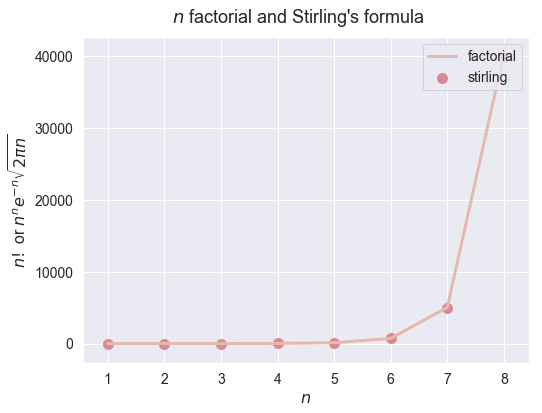

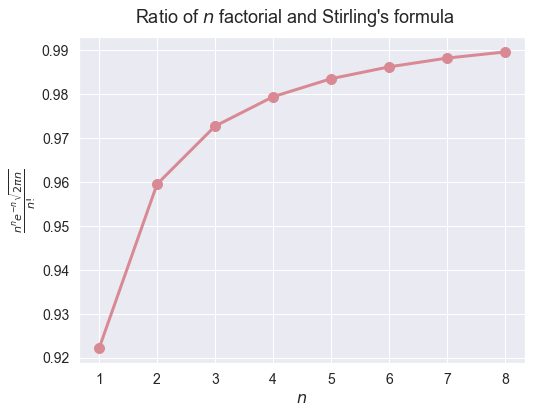

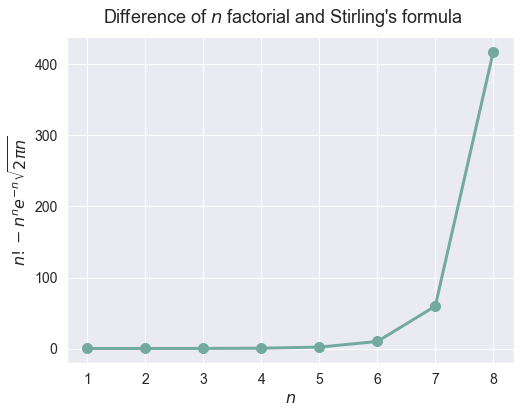

In [194]:
fig = figure_stirling(8, (8, 6), 18)

In [302]:
# Calculate the probabilities of p_0(n) 
def hat_check(n):
    '''
    n: a positive integer (number of hats)
    '''
    p_1 = 0
    p_2 = 0.5
    p_list = [p_1, p_2]
    while len(p_list) < n:
        # recursive relation
        p_list.append(p_list[-1] - 1/(len(p_list)+1)*(p_list[-1] - p_list[-2]))
    return p_list   

In [316]:
def figure_hat_check(n, fsize, fs):
    '''
    n: a positive integer (number of hats)
    fsize: figure size
    fs: font size
    '''
    sns.set()
    palette = tealrose
    
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    ax.plot(range(1, n+1), hat_check(n), linewidth = 3, color = palette[2])
    ax.scatter(range(1, n+1), hat_check(n), s = 100, color = palette[1])
    ax.set_xlabel(r'$n$', fontsize = fs - 2)
    ax.set_ylabel(r'$p_0(n)$', fontsize = fs - 2)
    plt.xticks(fontsize = fs - 4)
    plt.yticks(fontsize = fs - 4)
    fig.suptitle('Hat Check Problem', fontsize = fs, y = 0.95)
    fig.savefig(_Figure_PATH_ + 'hat_check.png', dpi = 400, bbox_inches='tight')
    return fig

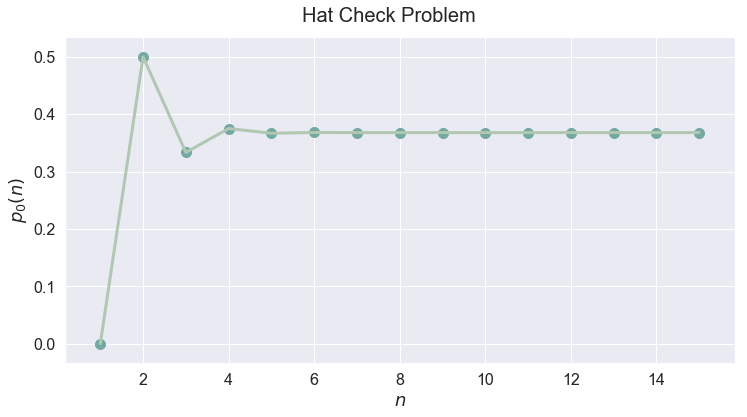

In [317]:
fig = figure_hat_check(15, (12, 6), 20)

### Slides 0708

* #### Pascal's Triangle
```python
from scipy.special import comb
pascal(n = 10, j = 5)
```

In [490]:
# Pascal’s Triangle
def pascal(n, j):
    '''
    n choose j is equal to the sum of (n - 1) choose j and (n - 1) choose (j - 1)
    '''
    n_choose_j = int(comb(n, j))
    sum_choose = int(comb(n-1, j) + comb(n-1, j-1))  
    return n_choose_j, sum_choose

In [401]:
Math(r'{10\choose 4} = ')

<IPython.core.display.Math object>

In [402]:
pascal(n = 10, j = 4)[0]

210

In [403]:
Math(r'{9 \choose 4} + {9 \choose 3} = ')

<IPython.core.display.Math object>

In [404]:
pascal(n = 10, j = 4)[1]

210

### Quiz 4

* #### Fixed Points
```python
fixed_points(n = 6, printing = True)
figure_fixed_points(n = 6, fsize = (8, 6), fs = 18)
```

In [643]:
def fixed_points(n, printing = True):
    '''
    n: size of the set
    printing: whether to print the result
    '''
    original_set = list(range(1, n + 1)) # the set {1, 2, ..., n}
    permutations = list(itertools.permutations(original_set))
    
    fps = []
    for p_set in permutations:
        p_set = list(p_set)
        # find the number of fixed points for the current permutation p_set
        fp = np.sum(np.asarray(p_set) == np.asarray(original_set)) 
        fps.append(fp)

    #fps = [item/len(fps) for item in fps] # normalization
    counter = collections.Counter(fps) # count the frequencies of 0 to n fixed points
    counter = sorted(counter.items()) # re-order
    x = [item[0] for item in counter]
    y = [item[1] for item in counter]
    
    n_factorial = math.factorial(n)
    
    for a, b in zip(x, y):
        numerator = int(b/math.gcd(b, n_factorial))
        denominator = int(n_factorial/math.gcd(b, n_factorial))
        print(str(a) + ' fixed points with probability: ' + str(numerator) + '/' + str(denominator))
    return x, y

In [653]:
x, y = fixed_points(4)

0 fixed points with probability: 3/8
1 fixed points with probability: 1/3
2 fixed points with probability: 1/4
4 fixed points with probability: 1/24


In [651]:
def figure_fixed_points(n, fsize = (8, 6), fs = 18):
    '''
    n: size of the set
    fsize: figure size
    fs: font size
    '''
    x, y = fixed_points(n)
    n_factorial = math.factorial(n)
    y_prob = [v/n_factorial for v in y] # normalization
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    sns.set_style('whitegrid')
    palette = tealrose
    palette = [item for item in palette for i in range(int(n/len(palette))+1)]
    ax.bar(x, y_prob, color = palette[:len(x)])
    
    for i in range(len(x)):
        numerator = int(y[i]/math.gcd(y[i], n_factorial))
        denominator = int(n_factorial/math.gcd(y[i], n_factorial))
        plt.text(x = x[i] - 0.25, y = y_prob[i] + 0.01, s = str(numerator) + '/' + str(denominator), size = fs - 4)

    ax.set_xlabel('number of fixed points', fontsize = fs - 2)
    ax.set_ylabel(r'$p_k(n)$', fontsize = fs - 2)
    ax.set_ylim(0, 0.42)
    plt.xticks(fontsize = fs - 4)
    plt.yticks(fontsize = fs - 4)
    fig.suptitle('Fixed points problem with ' + r'$n = $' + str(n), fontsize = fs, y = 0.95)
    fig.savefig(_Figure_PATH_ + 'fixed_points_' + str(n) + '.png', dpi = 400, bbox_inches='tight')
    

0 fixed points with probability: 11/30
1 fixed points with probability: 3/8
2 fixed points with probability: 1/6
3 fixed points with probability: 1/12
5 fixed points with probability: 1/120


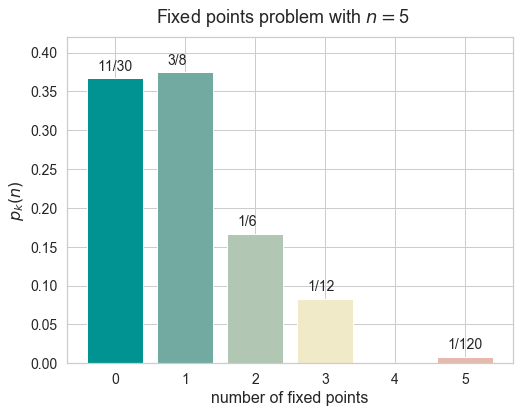

In [652]:
figure_fixed_points(n = 5, fsize = (8, 6), fs = 18)

### Slides 0710

* #### One Dimensional Random Walk
```python
random_walk_1D(n = 10, p = 0.6)
path_rw_1D(n = 10, p = 0.6, fsize = (8, 6), fs = 18, index = 1)
```

* #### Stock Market
```python
import yfinance as yf
load_STOCK_raw(company_index = 'AAPL')
figure_stock_price(company_index = 'AMZN', date_initial = datetime.date(int(2020),int(6),int(1)), 
                   fsize = (12, 6), fs = 20)
```

* #### Two Dimensional Random Walk (Take-Home Problem)
```python
random_walk_2D(n = 500, p_x = 0.5, p_y = 0.5)
path_rw_2D(n = 500, p_x = 0.5, p_y = 0.5, fsize = (8, 8), fs = 18, index = 1)
```

In [480]:
# One Dimensional Random Walk
def random_walk_1D(n, p):
    '''
    n: number of steps
    p: the probability of going right
    '''
    # Original position: x = 0
    positions = [0]
    pos = 0
    
    # Take n steps
    for i in range(n):
        # Generate a random number between 0 and 1
        u = random.uniform(0, 1)
        if u <= p:
            pos += 1 # go right
        else:
            pos -= 1 # go left
        positions.append(pos)
    return positions

def path_rw_1D(n, p, fsize = (8, 6), fs = 18, index = 1):
    '''
    n: number of steps
    p: the probability of going right
    fsize: figure size
    fs: font size
    index: recording the number of simulations: 1st, 2nd, 3rd, ...
    '''
    
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    sns.set_style('whitegrid')
    palette = tealrose
    x = range(0, n+1)
    positions = random_walk_1D(n, p)
    # point color: red (position is positive); green (position is nagative); yellow (position is zero)
    colors = [palette[-2] if pos > 0 else palette[2] for pos in positions]
    colors = [palette[3] if pos == 0 else colors[i] for i, pos in enumerate(positions)]
    ax.plot(x, positions, linewidth = 3, color = palette[3], zorder=1)
    ax.scatter(x, positions, s = 200, color = colors, zorder=2)
    ax.set_xlabel(r'$t$', fontsize = fs - 2)
    ax.set_ylabel('position', fontsize = fs - 2)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xticks(fontsize = fs - 4)
    plt.yticks(fontsize = fs - 4)
    fig.suptitle('1D Random walk: ' + r'n = ' + str(n) + ', ' + r'p = ' + str(p), fontsize = fs, y = 0.95)
    fig.savefig(_Figure_PATH_ + 'random_walk_path_' + str(index) + '.png', dpi = 400, bbox_inches='tight')

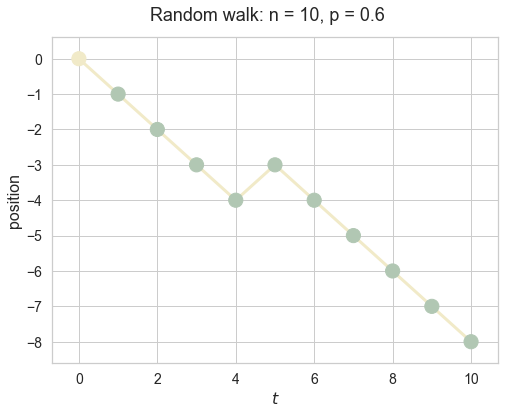

In [481]:
path_rw_1D(n = 10, p = 0.6, fsize = (8, 6), fs = 18, index = 1)

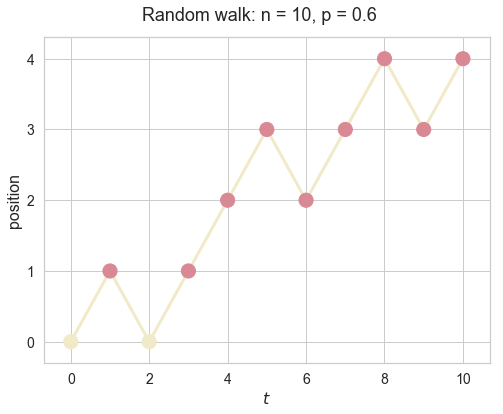

In [482]:
path_rw_1D(n = 10, p = 0.6, fsize = (8, 6), fs = 18, index = 2)

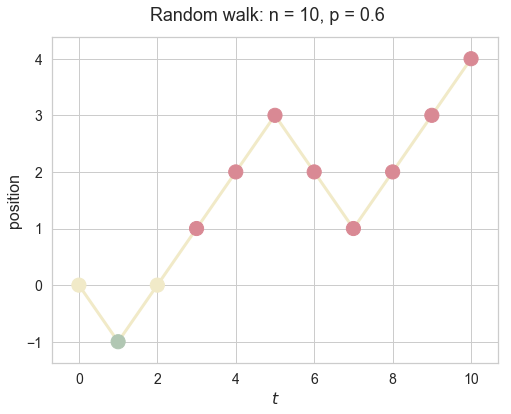

In [485]:
path_rw_1D(n = 10, p = 0.6, fsize = (8, 6), fs = 18, index = 3)

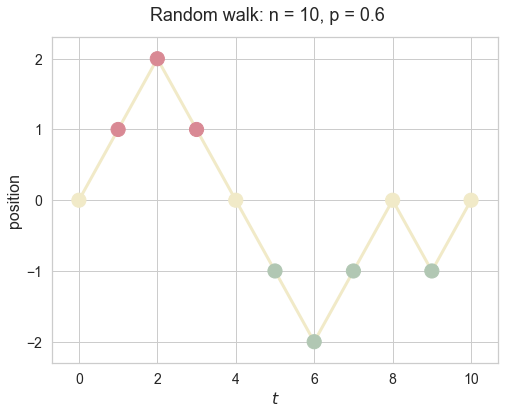

In [487]:
path_rw_1D(n = 10, p = 0.6, fsize = (8, 6), fs = 18, index = 4)

In [131]:
# Stock price of a certain cooperation
def load_STOCK_raw(company_index):
    '''
    This provides a way to lookinto the 'raw' data
    company_index: stock market index
    '''
    SP = yf.Ticker(company_index)
    raw = SP.history(period="max")
    raw = raw.reset_index()
    rename_dict = {'Date': 'update_date',
                   'Open': 'open',
                   'High': 'high',
                   'Low': 'low',
                   'Close': 'close', # closing price
                   'Volume': 'volume',
                   'Dividends': 'dividends',
                   'Stock Splits': 'stock splits'
                  }
    data = raw.rename(columns=rename_dict)
    data['update_date'] = pd.to_datetime(data['update_date'])  # original data type of update_time is 'str'
    data['update_date'] = data['update_date'].dt.date
    data = data.reset_index(drop = True)
    #print('Data date range: ', data['update_date'].min(), 'to', data['update_date'].max())
    #print('Number of rows in raw data: ', data.shape[0])
    return data

In [155]:
# https://fortune.com/fortune500/
# Top 15 Fortune 500 companies and Zoom Video Communications
company_index_list = ['WMT', 'XOM', 'AAPL', 'BRK-A', 'AMZN', 'UNH', 'MCK', 'CVS',
                  'T', 'ABC', 'CVX', 'F', 'GM', 'COST', 'GOOGL', 'ZM', 'DIS']
company_name_list = ['Walmart', 'Exxon Mobil', 'Apple', 'Berkshire Hathaway',
                   'Amazon', 'UnitedHealth Group', 'McKesson', 'CVS Health',
                   'AT&T', 'AmerisourceBergen', 'Chevron', 'Ford Motor', 
                   'General Motors', 'Costco Wholesale', 'Alphabet', 'Zoom', 'Walt Disney']

In [159]:
def figure_stock_price(company_index, date_initial, fsize, fs):
    '''
    company_index: stock market index
    date_initial: what date does the plot start on?
    fsize: figure size
    fs: font size
    '''
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    sns.set_style("whitegrid")
    palette = tealrose
    
    data_stock = load_STOCK_raw(company_index)
    data_stock = data_stock[data_stock['update_date'] >= date_initial]
    data_stock = data_stock.reset_index(drop = True)
    ax.plot(data_stock['update_date'], data_stock['close'], linewidth = 4, color = palette[3], zorder = 1)
    color_index = company_index_list.index(company_index)%6
    if color_index >=3:
        color_index += 1
    ax.scatter(data_stock['update_date'], data_stock['close'], 
               s = 100, color = palette[color_index], alpha = 0.75, zorder = 2)
    
    ax.set_xlabel('date', fontsize = fs - 2)
    ax.set_ylabel('stock price', fontsize = fs - 2)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    plt.xticks(fontsize = fs - 4)
    plt.yticks(fontsize = fs - 4)
    company_name = company_name_list[company_index_list.index(company_index)]
    fig.suptitle(company_name, fontsize = fs, y = 0.94)
    fig.savefig(_Figure_PATH_ + 'stock_price_' + company_index + '.png', dpi = 400, bbox_inches='tight')
    

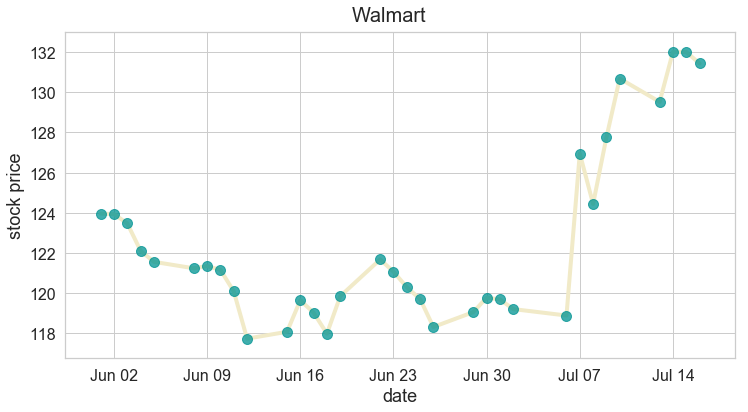

In [134]:
figure_stock_price(company_index = 'WMT', date_initial = datetime.date(int(2020),int(6),int(1)), 
                   fsize = (12, 6), fs = 20)

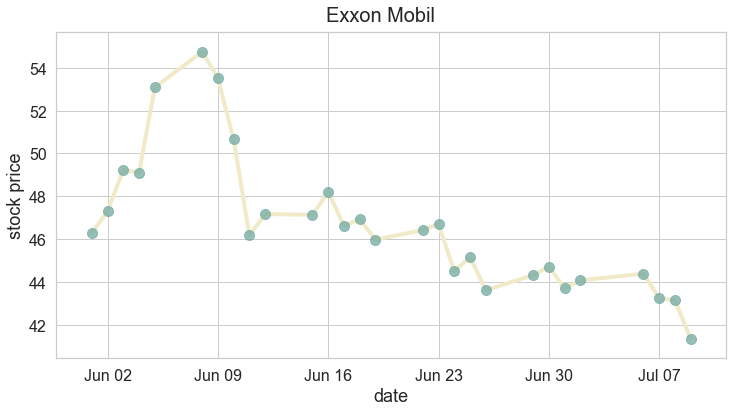

In [813]:
figure_stock_price(company_index = 'XOM', date_initial = datetime.date(int(2020),int(6),int(1)), 
                   fsize = (12, 6), fs = 20)

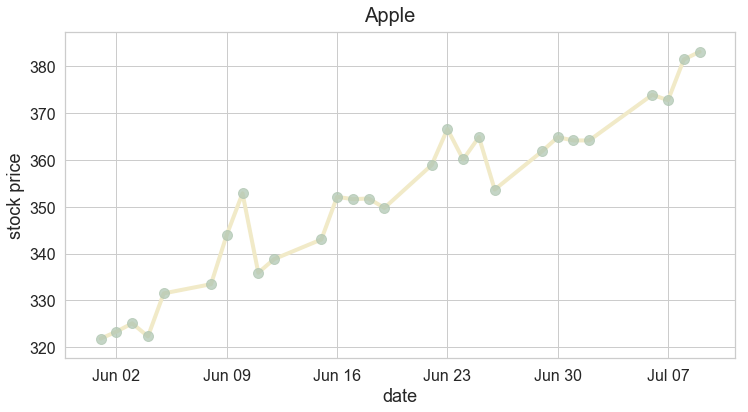

In [814]:
figure_stock_price(company_index = 'AAPL', date_initial = datetime.date(int(2020),int(6),int(1)), 
                   fsize = (12, 6), fs = 20)

In [ ]:
figure_stock_price(company_index = 'BRK-A', date_initial = datetime.date(int(2020),int(6),int(1)), 
                   fsize = (12, 6), fs = 20)
figure_stock_price(company_index = 'AMZN', date_initial = datetime.date(int(2020),int(6),int(1)), 
                   fsize = (12, 6), fs = 20)
figure_stock_price(company_index = 'ZM', date_initial = datetime.date(int(2020),int(6),int(1)), 
                   fsize = (12, 6), fs = 20)

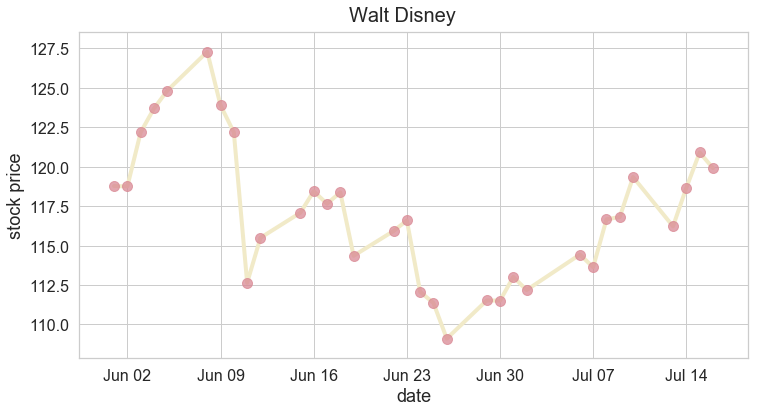

In [160]:
figure_stock_price(company_index = 'DIS', date_initial = datetime.date(int(2020),int(6),int(1)), 
                   fsize = (12, 6), fs = 20)

In [22]:
# Two Dimensional Random Walk
def random_walk_2D(n, p_x, p_y):
    '''
    n: number of steps
    p_x: the probability of going right
    p_y: the probability of going up
    '''
    # Original position: x = 0
    positions = [(0, 0)]
    pos_x = 0
    pos_y = 0
    
    # Take n steps
    for i in range(n):
        # Generate a random number between 0 and 1
        u = random.uniform(0, 1)
        v = random.uniform(0, 1)
        pos_x += (lambda temp: 1 if temp<= p_x else -1)(u)
        pos_y += (lambda temp: 1 if temp<= p_y else -1)(v)
        positions.append((pos_x, pos_y))
    return positions
def path_rw_2D(n, p_x, p_y, fsize = (8, 6), fs = 18, index = 1):
    '''
    n: number of steps
    p_x: the probability of going right
    p_y: the probability of going up
    fsize: figure size
    fs: font size
    index: recording the number of simulations: 1st, 2nd, 3rd, ...
    '''
    
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    sns.set_style('whitegrid')
    palette = tealrose
    positions = random_walk_2D(n, p_x, p_y)
    x = [item[0] for item in positions]
    y = [item[1] for item in positions]
    
    def color(x_pos, y_pos):
        if x_pos == 0 or y_pos == 0:
            return palette[3] # x-axis or y-axis
        elif x_pos > 0 and y_pos > 0:
            return palette[-1] # first quadrant (point color: red)
        elif x_pos < 0 and y_pos > 0:
            return palette[-3] # second quadrant (point color: pale red)
        elif x_pos < 0 and y_pos < 0:
            return palette[0] # third quadrant (point color: green)
        else:
            return palette[2] # forth quadrant (point color: pale green)
        
    colors = [color(x_pos, y_pos) for x_pos, y_pos in zip(x, y)]
    
    ax.plot(x, y, linewidth = 3, color = palette[3], zorder = 1)
    ax.scatter(x, y, s = 20, color = colors, zorder = 2)
    ax.set_xlabel(r'$x$' + ' position', fontsize = fs - 2)
    ax.set_ylabel(r'$y$' + ' position', fontsize = fs - 2)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xticks(fontsize = fs - 4)
    plt.yticks(fontsize = fs - 4)
    pos_max = max(np.max(x), np.max(y), abs(np.min(x)), abs(np.min(y)))
    ax.set_xlim(-pos_max, pos_max)
    ax.set_ylim(-pos_max, pos_max)
    fig.suptitle('2D Random walk: ' + r'$n = $' + str(n) + ', ' + r'$p = ($' + str(p_x) + ', ' + str(p_y) + r'$)$', fontsize = fs, y = 0.95)
    fig.savefig(_Figure_PATH_ + 'random_walk_2D_path_' + str(index) + '.png', dpi = 400, bbox_inches='tight')

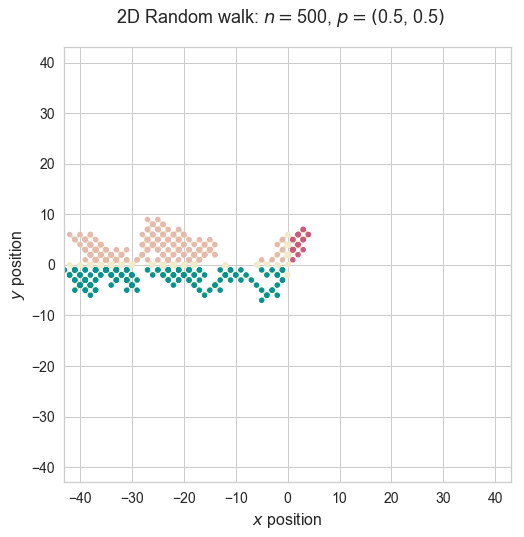

In [23]:
path_rw_2D(n = 500, p_x = 0.5, p_y = 0.5, fsize = (8, 8), fs = 18, index = 1)

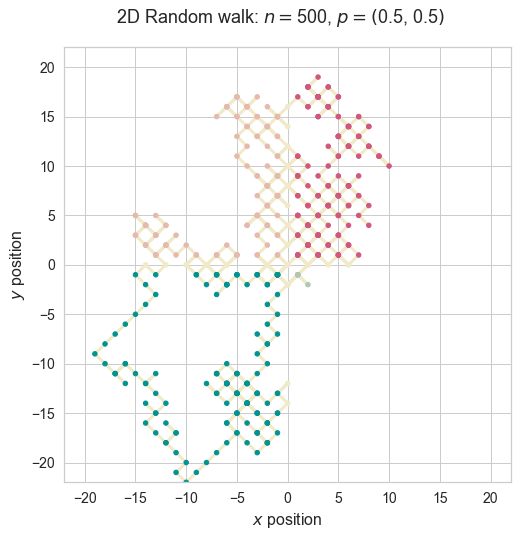

In [872]:
path_rw_2D(n = 500, p_x = 0.5, p_y = 0.5, fsize = (8, 8), fs = 18, index = 2)

### Slides 0717
* #### Two Dimensional Normal Distribution: Density Function and Contour curve
```python
figure_normal_2d(ind = True, fsize = (10, 6), fs = 20)
figure_contour_normal_2d(ind = True, fsize = (10, 6), fs = 20)
```


In [221]:
def figure_normal_2d(ind, fsize, fs):
    '''
    ind: whether the two random variables are independent or not
    fsize: figure size
    fs: font size
    '''
    # Our 2-dimensional distribution will be over random variables X and Y.
    N = 60
    X = np.linspace(-3, 3, N)
    Y = np.linspace(-3, 5, N)
    X, Y = np.meshgrid(X, Y)

    # Mean vector and covariance matrix
    mu = np.array([0., 1.])
    if ind == False:
        sigma = np.array([[ 1. , -0.5], [-0.5,  2]])
    else:
        sigma = np.array([[ 1. , 0], [0,  2]])

    # Pack X and Y into a single 3-dimensional array.
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    
    cmap = cm.RdBu_r

    def multivariate_normal_custom(pos, mu, sigma):
        """
        Return the multivariate Gaussian distribution on the array pos,
        which is an array constructed by packing the meshed arrays of variables
        x_1, x_2, x_3, ..., x_k into its last dimension.

        """
        n = mu.shape[0]
        sigma_det = np.linalg.det(sigma)
        sigma_inv = np.linalg.inv(sigma)
        N = np.sqrt((2*np.pi)**n * sigma_det)
        # This einsum call calculates (x-mu)T.sigma-1.(x-mu) in a vectorized way across all the input variables.
        fac = np.einsum('...k,kl,...l->...', pos-mu, sigma_inv, pos-mu)

        return np.exp(-fac/2)/N

    # The distribution on the random variables X, Y packed into pos.
    Z = multivariate_normal_custom(pos, mu, sigma)
    
    # Create a surface plot and projected filled contour plot under it.
    fig = plt.figure(figsize = fsize)
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, rstride = 3, cstride = 3, linewidth = 1, antialiased = True, cmap = cmap)

    cset = ax.contourf(X, Y, Z, zdir = 'z', offset = -0.15, cmap = cmap, alpha = 0.8)

    # Adjust the limits, ticks and view angle.
    ax.set_zlim(-0.15, 0.15)
    ax.set_zticks(np.linspace(0, 0.15, 4))
    ax.view_init(27, -21)
    
    ax.set_xlabel(r'$x$', fontsize = fs - 2)
    ax.set_ylabel(r'$y$', fontsize = fs - 2)
    ax.set_zlabel(r'$f(x, y)$', fontsize = fs - 2)
    fig.suptitle('Bivariate normal distribution', fontsize = fs, y = 0.95)
    if ind == True:
        fig.savefig(_Figure_PATH_ + 'normal_2d_ind_' + 'pdf' + '.png', dpi = 400, bbox_inches='tight')
    else:
        fig.savefig(_Figure_PATH_ + 'normal_2d_' + 'pdf' + '.png', dpi = 400, bbox_inches='tight')
    plt.show()
    return fig

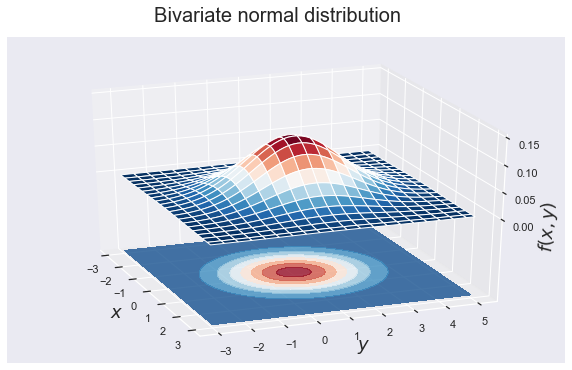

In [222]:
fig = figure_normal_2d(ind = True, fsize = (10, 6), fs = 20)

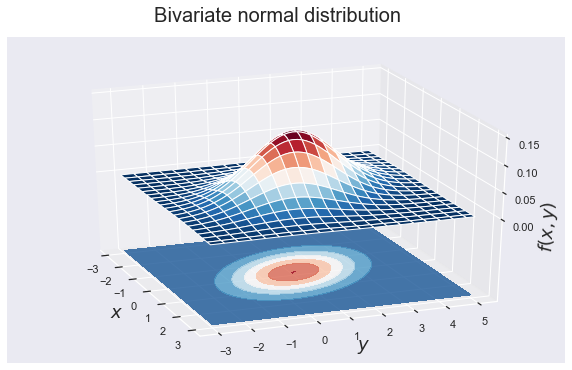

In [223]:
fig = figure_normal_2d(ind = False, fsize = (10, 6), fs = 20)

In [226]:
def figure_contour_normal_2d(ind, fsize, fs):
    '''
    ind: whether the two random variables are independent or not
    fsize: figure size
    fs: font size
    '''
    x, y = np.mgrid[-3:3:.01, -3:5:.01]
    pos = np.dstack((x, y))
    mu = np.array([0., 1.])
    if ind == False:
        rv = multivariate_normal([0, 1], [[ 1. , -0.5], [-0.5,  2]])
    else:
        rv = multivariate_normal([0, 1], [[ 1. , 0], [0,  2]])
    
    cmap = cm.RdBu_r
    
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)

    ax.contourf(x, y, rv.pdf(pos), cmap = cmap, alpha = 0.8)
    
    ax.set_xlabel(r'$x$', fontsize = fs - 2)
    ax.set_ylabel(r'$y$', fontsize = fs - 2)
    
    fig.suptitle('Bivariate normal distribution', fontsize = fs, y = 0.95)
    if ind == True:
        fig.savefig(_Figure_PATH_ + 'normal_2d_ind_contour.png', dpi = 400, bbox_inches='tight')
    else:
        fig.savefig(_Figure_PATH_ + 'normal_2d_contour.png', dpi = 400, bbox_inches='tight')
    plt.show()
    return fig

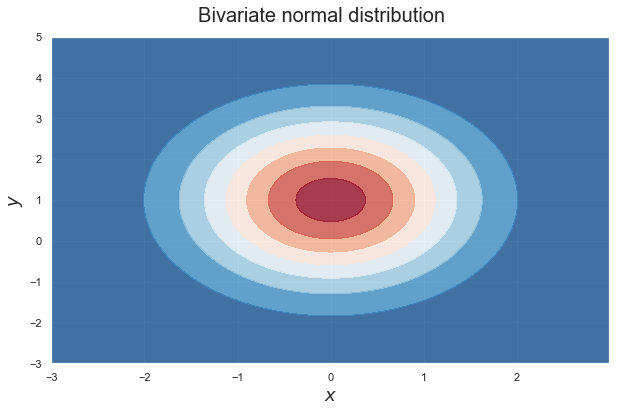

In [227]:
fig = figure_contour_normal_2d(ind = True, fsize = (10, 6), fs = 20)

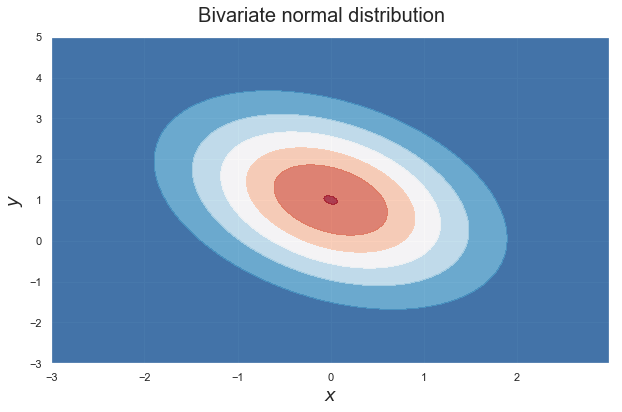

In [228]:
fig = figure_contour_normal_2d(ind = False, fsize = (10, 6), fs = 20)

### Midterm 1
* #### Character attribute points in a Role Playing Game
```python
RPG_points(p_list = [1, 2, 3, 4])
```
* #### Random Walk Model for Stock Price
```python
random_walk_sp(n = 30, p = 0.6, c = 100, u = 1.1, d = 0.9)
path_rw_sp(company_index = 'DIS', date_initial = datetime.date(int(2020),int(6),int(1)), 
           p = 0.6, u = 1.1, d = 0.9, fsize = (12, 6), fs = 20, index = 1)
```

In [27]:
def RPG_points(p_list = [1, 2, 3, 4]):
    '''
    p_list: pool of points
    '''
    attr_list = []
    
    for a in p_list:
        for b in p_list:
            for c in p_list:
                for d in p_list:
                    if (a + b + c + d == 10) and ((a, b, c, d) not in attr_list):
                        attr_list.append((a, b, c, d))
                        
    print('Number of possible ways: ' + str(len(attr_list)))

In [28]:
RPG_points()
RPG_points(p_list = [0, 1, 2, 3, 4, 5])

Number of possible ways: 44
Number of possible ways: 146


In [24]:
# Random walk model for stock price
def random_walk_sp(n, p, c, u, d):
    '''
    n: number of steps (days)
    p: the probability of going right
    c: original stock price
    u: factor for up
    d: factor for down
    '''
    # Original position: S(0) = c
    positions = [c]
    pos = c
    
    # Take n steps
    for i in range(n):
        # Generate a random number between 0 and 1
        w = random.uniform(0, 1)
        if w <= p:
            pos *= u # go up
        else:
            pos *= d # go down
        positions.append(pos)
    return positions

def path_rw_sp(company_index, date_initial, p, u, d, fsize = (8, 6), fs = 18, index = 1):
    '''
    company_index: stock market index
    date_initial: what date does the plot start on?
    p: the probability of going right
    u: factor for up
    d: factor for down
    fsize: figure size
    fs: font size
    index: recording the number of simulations: 1st, 2nd, 3rd, ...
    '''
    data_stock = load_STOCK_raw(company_index)
    data_stock = data_stock[data_stock['update_date'] >= date_initial]
    data_stock = data_stock.reset_index(drop = True)
    n = data_stock.shape[0] - 1 
    c = data_stock['close'][0]
    
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    sns.set_style('whitegrid')
    palette = tealrose
    positions = random_walk_sp(n, p, c, u, d)
    # point color: red (S(t) > c); green (S(t) < c); yellow (S(t) = c)
    colors = [palette[-2] if pos > c else palette[2] for pos in positions]
    colors = [palette[3] if pos == c else colors[i] for i, pos in enumerate(positions)]
    
    ax.plot(data_stock['update_date'], positions, linewidth = 3, color = palette[3], zorder=1)
    ax.scatter(data_stock['update_date'], positions, s = 100, color = colors, zorder=2)
    ax.set_xlabel('date', fontsize = fs - 2)
    ax.set_ylabel('stock price', fontsize = fs - 2)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    plt.xticks(fontsize = fs - 4)
    plt.yticks(fontsize = fs - 4)
    fig.suptitle('Random walk model: ' + r'p = ' + str(p) + ', ' + r'u = ' + str(u) + ', ' + r'd = ' + str(d), fontsize = fs, y = 0.95)
    fig.savefig(_Figure_PATH_ + 'random_walk_sp_path_' + str(index) + '.png', dpi = 400, bbox_inches='tight')

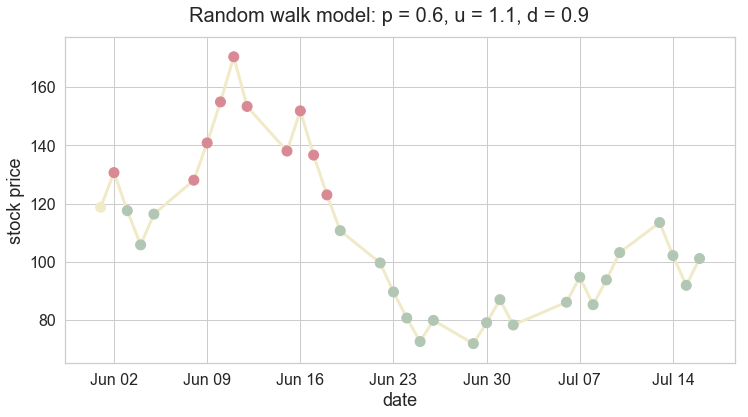

In [158]:
# Walt Disney
path_rw_sp(company_index = 'DIS', date_initial = datetime.date(int(2020),int(6),int(1)), 
           p = 0.6, u = 1.1, d = 0.9, fsize = (12, 6), fs = 20, index = 1)

In [540]:
# The variance can be lower or higher
def figure_hershey_var_dist(sigma, fsize, fs):
    '''
    n: number of hershey kisses in the sample
    sigma: standard deviation of the sample
    fsize: figure size
    fs: font size
    '''
    n = 1000
    mu = 0.16 # a single standard Hershey's Kiss weighs 0.16 ounces.
    
    normal_array = np.round(np.random.normal(mu, sigma, n), 4)
    
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    sns.distplot(normal_array, hist = True, kde = False, # plot both the histogram and the density function
                 bins=int(10), color = '#514843', hist_kws={'edgecolor':'white'}, kde_kws={'linewidth': 4})
    title_dict = {'0.001': 'A', '0.002': 'B', '0.005': 'C', '0.01': 'D'}
    ax.set_xlim(0.14, 0.18)
    ax.set_xlabel(r'$X$', fontsize = fs - 2)
    ax.set_ylabel('Frequency (Density)', fontsize = fs - 2)
    plt.xticks(fontsize = fs - 4)
    plt.yticks(fontsize = fs - 4)
    fig.suptitle('Grade ' + title_dict[str(sigma)] + ', ' + r'$\sigma = $' + str(sigma), fontsize = fs, y = 0.94)
    fig.savefig(_Figure_PATH_ + 'hershey_distribution_' + title_dict[str(sigma)] + '.png', dpi = 400)

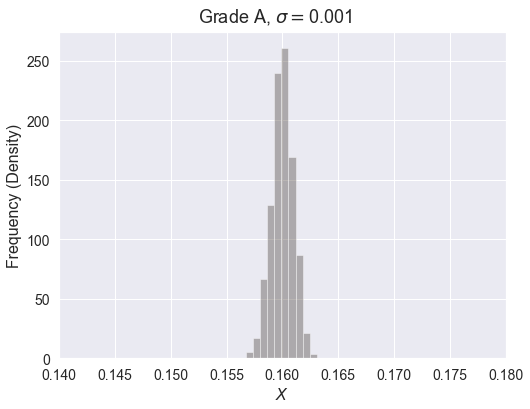

In [541]:
figure_hershey_var_dist(sigma = 0.001, fsize = (8, 6), fs = 18)

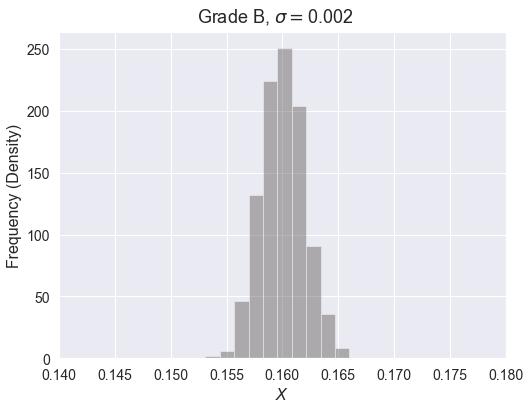

In [542]:
figure_hershey_var_dist(sigma = 0.002, fsize = (8, 6), fs = 18)

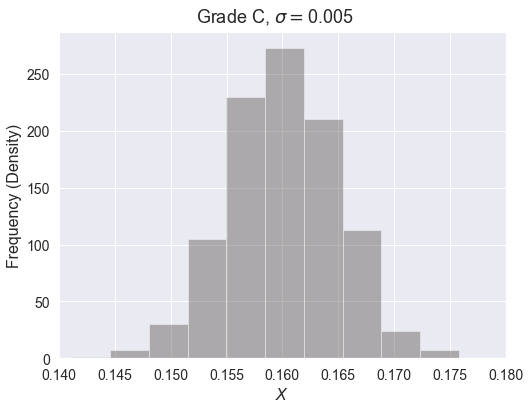

In [543]:
figure_hershey_var_dist(sigma = 0.005, fsize = (8, 6), fs = 18)

In [533]:
#figure_hershey_var_dist(sigma = 0.01, fsize = (8, 6), fs = 18)

In [51]:
# density function (pdf) for continuous uniform distribution
def figure_continuous_uniform(fsize, fs):
    '''
    fsize: figure size
    fs: font size
    '''
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    # Create the bins and histogram
    # Plot the distribution curve
    for a, b in [(0, 6), (2, 5), (3, 7)]:
        bins = np.linspace(a, b, 100)
        y = [1/(b - a)]*len(bins)
        ax.plot(bins, y, linewidth = 3, label = r'$a = $' + str(a) + ', ' + r'$b$ = ' + str(b))
        ax.fill_between(bins, y, label = None, alpha = 0.5)
    ax.set_xlabel(r'$x$', fontsize = fs - 2)
    ax.set_ylabel(r'$f(x)$', fontsize = fs - 2)
    plt.xticks(fontsize = fs - 6)
    plt.yticks(fontsize = fs - 6)
    ax.legend(loc='upper right', fancybox = True, ncol = 1, fontsize = fs - 4)
    fig.suptitle('Continuous uniform distribution', fontsize = fs, y = 0.95)
    fig.savefig(_Figure_PATH_ + 'c_uniform_' + 'pdf' + '.png', dpi = 400, bbox_inches='tight')
    plt.show()
    return fig

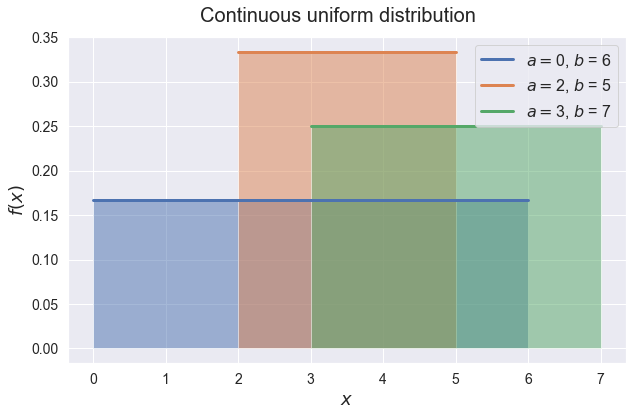

In [52]:
fig = figure_continuous_uniform(fsize = (10, 6), fs = 20)

In [53]:
# density function (pdf) for exponential distribution
def figure_exponential(fsize, fs):
    '''
    fsize: figure size
    fs: font size
    '''
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    # Create the bins and histogram
    bins = np.linspace(0, 5, 100)
    # Plot the distribution curve
    for lam in [2, 1, 0.5]:
        y = lam*np.exp(-lam*bins)
        ax.plot(bins, y, linewidth = 3, label = r'$\lambda = $' + str(lam))
        ax.fill_between(bins, y, label = None, alpha = 0.2)
    ax.set_xlabel(r'$x$', fontsize = fs - 2)
    ax.set_ylabel(r'$f(x)$', fontsize = fs - 2)
    plt.xticks(fontsize = fs - 6)
    plt.yticks(fontsize = fs - 6)
    ax.legend(loc='upper right', fancybox = True, ncol = 1, fontsize = fs - 4)
    fig.suptitle('Exponential distribution', fontsize = fs, y = 0.95)
    fig.savefig(_Figure_PATH_ + 'exponential_' + 'pdf' + '.png', dpi = 400, bbox_inches='tight')
    plt.show()
    return fig

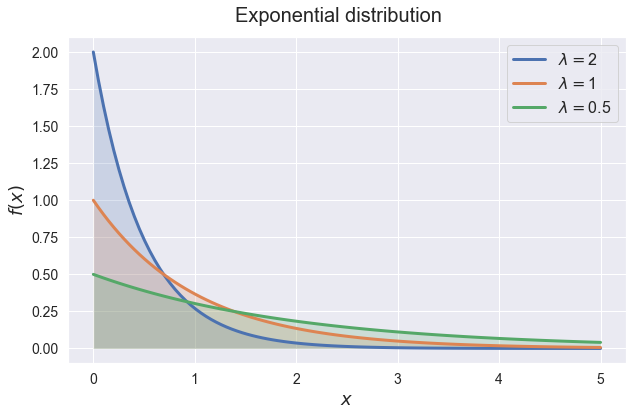

In [55]:
fig = figure_exponential(fsize = (10, 6), fs = 20)

In [56]:
# density function (pdf) for normal distribution
def figure_normal(fsize, fs):
    '''
    fsize: figure size
    fs: font size
    '''
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    # Create the bins and histogram
    bins = np.linspace(-8, 8, 100)
    # Plot the distribution curve
    for mu, sigma in [(-1, 2), (0, 1), (2, np.sqrt(2))]:
        y = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins - mu)**2/(2 * sigma**2))
        ax.plot(bins, y, linewidth = 3, label = r'$\mu = $' + str(mu) + ', ' + r'$\sigma^2$ = ' + str(int(sigma**2)))
        ax.fill_between(bins, y, label = None, alpha = 0.5)
    ax.set_xlabel(r'$x$', fontsize = fs - 2)
    ax.set_ylabel(r'$f(x)$', fontsize = fs - 2)
    plt.xticks(fontsize = fs - 6)
    plt.yticks(fontsize = fs - 6)
    ax.legend(loc='upper right', fancybox = True, ncol = 1, fontsize = fs - 4)
    fig.suptitle('Normal distribution', fontsize = fs, y = 0.95)
    fig.savefig(_Figure_PATH_ + 'normal_' + 'pdf' + '.png', dpi = 400, bbox_inches='tight')
    plt.show()
    return fig

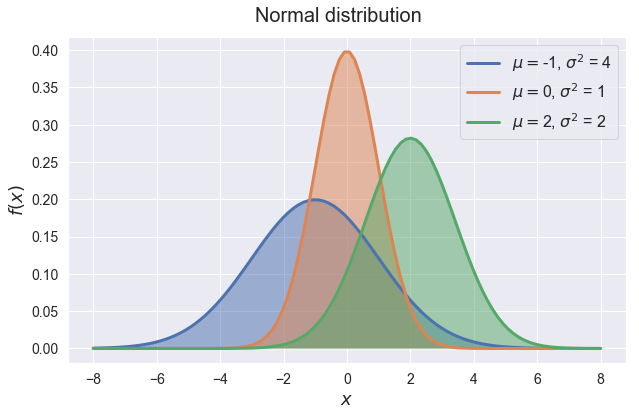

In [57]:
fig = figure_normal(fsize = (10, 6), fs = 20)

In [560]:
# density function (pdf) for Cauchy distribution
def figure_cauchy(fsize, fs):
    '''
    fsize: figure size
    fs: font size
    '''
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    # Create the bins and histogram
    bins = np.linspace(-8, 8, 100)
    # Plot the distribution curve
    for a in [1, 2, 3]:
        y = a/math.pi/(a**2 + bins**2)
        ax.plot(bins, y, linewidth = 3, label = r'$a = $' + str(a))
        ax.fill_between(bins, y, label = None, alpha = 0.2)
    ax.set_xlabel(r'$x$', fontsize = fs - 2)
    ax.set_ylabel(r'$f(x)$', fontsize = fs - 2)
    plt.xticks(fontsize = fs - 6)
    plt.yticks(fontsize = fs - 6)
    ax.legend(loc='upper right', fancybox = True, ncol = 1, fontsize = fs - 4)
    fig.suptitle('Cauchy distribution', fontsize = fs, y = 0.95)
    fig.savefig(_Figure_PATH_ + 'cauchy_' + 'pdf' + '.png', dpi = 400, bbox_inches='tight')
    plt.show()
    return fig

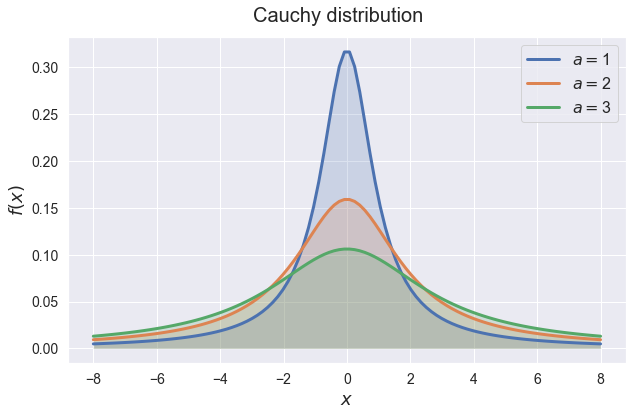

In [561]:
fig = figure_cauchy(fsize = (10, 6), fs = 20)

### Dataset Pokemon

URL: https://www.kaggle.com/abcsds/pokemon

This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. It has been of great use when teaching statistics to kids. With certain types you can also give a geeky introduction to machine learning.

This are the raw attributes that are used for calculating how much damage an attack will do in the games. This dataset is about the pokemon games (NOT pokemon cards or Pokemon Go).

The data as described by Myles O'Neill is:

#: ID for each pokemon

Name: Name of each pokemon

Type 1: Each pokemon has a type, this determines weakness/resistance to attacks

Type 2: Some pokemon are dual type and have 2

Total: sum of all stats that come after this, a general guide to how strong a pokemon is

HP: hit points, or health, defines how much damage a pokemon can withstand before fainting

Attack: the base modifier for normal attacks (eg. Scratch, Punch)

Defense: the base damage resistance against normal attacks

SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

SP Def: the base damage resistance against special attacks

Speed: determines which pokemon attacks first each round

The data for this table has been acquired from several different sites, including:

pokemon.com

pokemondb

bulbapedia

One question has been answered with this database: The type of a pokemon cannot be inferred only by it's Attack and Deffence. It would be worthy to find which two variables can define the type of a pokemon, if any. Two variables can be plotted in a 2D space, and used as an example for machine learning. This could mean the creation of a visual example any geeky Machine Learning class would love.

In [404]:
_POKEMON_DATA_FILE_ = './data/Pokemon.csv'

def load_pokemon_raw():
    
    raw = pd.read_csv(_POKEMON_DATA_FILE_)
    raw = raw.drop('#', 1) # delete the first column
    
    return raw

In [405]:
data_pokemon = load_pokemon_raw()

In [550]:
data_pokemon.head()

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
0              Bulbasaur  Grass  Poison    318  45      49       49       65   
1                Ivysaur  Grass  Poison    405  60      62       63       80   
2               Venusaur  Grass  Poison    525  80      82       83      100   
3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123      122   
4             Charmander   Fire     NaN    309  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False

In [498]:
def figure_pokemon(df, column_A, column_B, job, fs):
    
    # pokemon color palette
    palette = ['#FF0000', '#CC0000', '#3B4CCA', '#FFDE00', '#B3A125']
    x = df[column_A]
    y = df[column_B]
    #fig = plt.figure() # figsize = fsize
    
    if job == 'scatter':
        g = sns.jointplot(x = x, y = y, kind = job, color = (lambda x: palette[2] if x == 'Defense' else palette[1])(column_B), 
                          edgecolor = None, alpha = 0.6, height = 6)
    elif job == 'kde':
        g = sns.jointplot(x = x, y = y, kind = job, color = palette[3], alpha = 0.8, height = 6)
    elif job == 'hex':
        g = sns.jointplot(x = x, y = y, kind = job, color = (lambda x: palette[2] if x == 'Defense' else palette[1])(column_B), height = 6)
    
    g.set_axis_labels(column_A, column_B, fontsize = fs - 2)
    
    g.ax_marg_x.set_axis_off()
    g.ax_marg_y.set_axis_off()
    #fig.suptitle('Pokemon', fontsize = fs, y = 0.95)
    g.savefig(_Figure_PATH_ + 'pokemon_' + column_A[0] + column_B[0] + '_' + job + '.png', dpi = 400, bbox_inches='tight')
    plt.show()
    return g

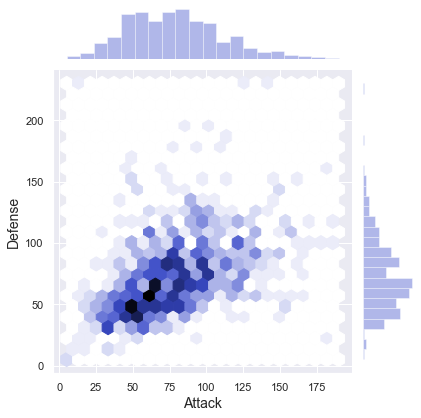

In [499]:
g = figure_pokemon(df = data_pokemon, column_A = 'Attack', column_B = 'Defense', 
                     job = 'hex', fs = 16)

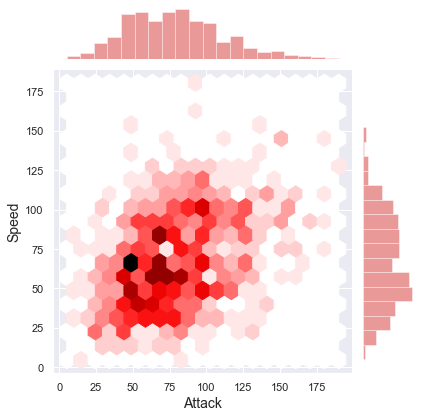

In [500]:
g = figure_pokemon(df = data_pokemon, column_A = 'Attack', column_B = 'Speed', 
                     job = 'hex', fs = 16)

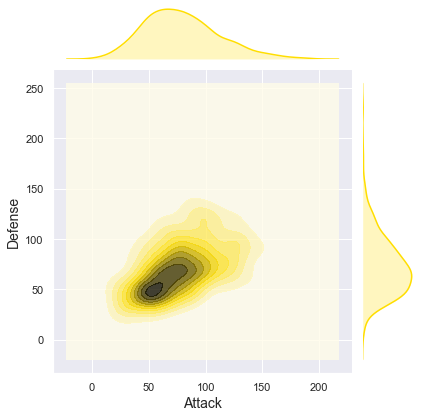

In [496]:
g = figure_pokemon(df = data_pokemon, column_A = 'Attack', column_B = 'Defense', 
                     job = 'kde', fs = 16)

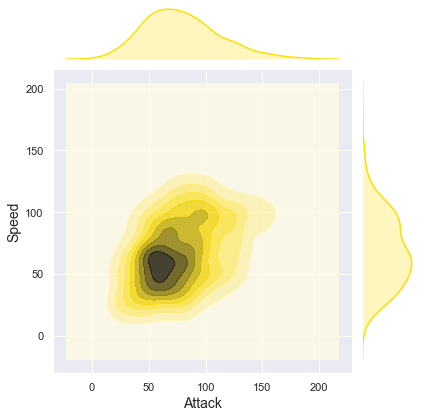

In [495]:
g = figure_pokemon(df = data_pokemon, column_A = 'Attack', column_B = 'Speed', 
                     job = 'kde', fs = 16)

### Dataset Red Wine Quality

url: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

Content
For more information, read [Cortez et al., 2009].

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)


In [32]:
_WINE_DATA_FILE_ = './data/Wine.csv'

def load_wine_raw():
    
    raw = pd.read_csv(_WINE_DATA_FILE_)
    
    return raw

In [33]:
data_wine = load_wine_raw()

In [34]:
data_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [47]:
def figure_wine(df, column_A, column_B, job, fs):
    
    # wine color palette
    # https://www.schemecolor.com/night-entwined.php
    palette = ['#741C2E', '#AD5255', '#A49C4D', '#2D5070', '#142D57']
    color_dict = {'density': 0, 'pH': 1, 'sulphates': 3, 'alcohol': 4, 'quality': 2,
                  'residual sugar': 3, 'chlorides': 3, 'free sulfur dioxide': 3, 'total sulfur dioxide': 3}
    x = df[column_A]
    y = df[column_B]
    
    sns.set()
    
    if job == 'scatter':
        g = sns.jointplot(x = x, y = y, kind = job, color = palette[color_dict[column_B]], edgecolor = None, alpha = 0.6, height = 6)
    elif job == 'reg':
        g = sns.jointplot(x = x, y = y, kind = job, color = palette[color_dict[column_B]], height = 6)
    elif job == 'kde':
        g = sns.jointplot(x = x, y = y, kind = job, color = palette[color_dict[column_B]], alpha = 0.8, height = 6)
    elif job == 'hex':
        g = sns.jointplot(x = x, y = y, kind = job, color = palette[color_dict[column_B]], height = 6)
    
    g.annotate(pearsonr, fontsize = fs - 4)
    g.set_axis_labels(column_A, column_B, fontsize = fs - 2)
    
    g.ax_marg_x.set_axis_off()
    g.ax_marg_y.set_axis_off()
    
    g.savefig(_Figure_PATH_ + 'wine_' + column_A[0] + column_B[0] + '_' + job + '.png', dpi = 400, bbox_inches='tight')
    plt.show()
    return g

In [48]:
#fig = figure_wine(df = data_wine, column_A = 'fixed acidity', column_B = 'volatile acidity', 
                     #job = 'reg', fs = 16)

In [49]:
#fig = figure_wine(df = data_wine, column_A = 'fixed acidity', column_B = 'volatile acidity', 
                     #job = 'reg', fs = 16)

In [50]:
#fig = figure_wine(df = data_wine, column_A = 'fixed acidity', column_B = 'free sulfur dioxide', 
                     #job = 'reg', fs = 16)

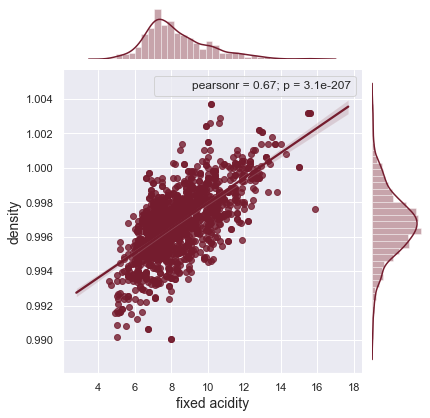

In [51]:
fig = figure_wine(df = data_wine, column_A = 'fixed acidity', column_B = 'density', 
                     job = 'reg', fs = 16)

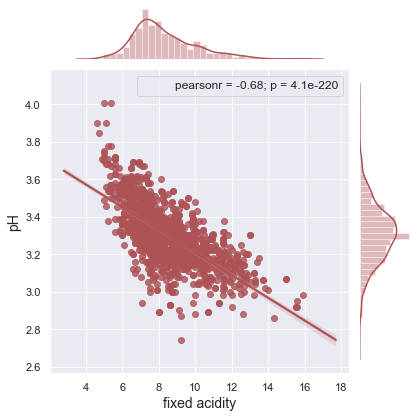

In [52]:
fig = figure_wine(df = data_wine, column_A = 'fixed acidity', column_B = 'pH', 
                     job = 'reg', fs = 16)

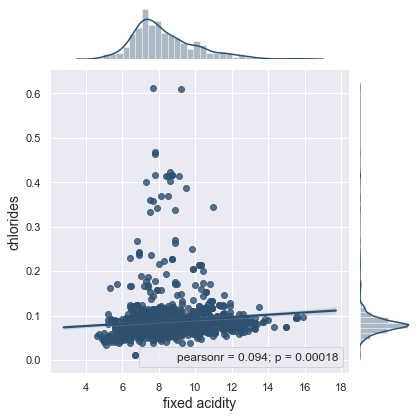

In [53]:
fig = figure_wine(df = data_wine, column_A = 'fixed acidity', column_B = 'chlorides', 
                     job = 'reg', fs = 16)

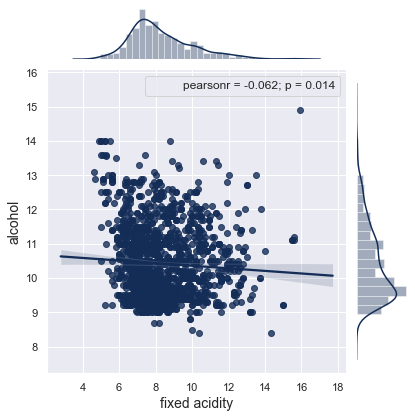

In [54]:
fig = figure_wine(df = data_wine, column_A = 'fixed acidity', column_B = 'alcohol', 
                     job = 'reg', fs = 16)

In [55]:
#fig = figure_wine(df = data_wine, column_A = 'fixed acidity', column_B = 'quality', 
                     #job = 'hex', fs = 16)

In [56]:
def dices(n):
    '''
    n: how many times
    '''
    m_1 = [1/6]*6
    
    if n == 2:
        # np.convolve returns the discrete, linear convolution of two one-dimensional sequences.
        m_n = np.convolve(m_1, m_1)
    else:
        m_n = np.convolve(dices(n-1), m_1)
    
    return m_n

In [57]:
# Sum of the outcomes of rolling a dice n times
def figure_dices(n, fsize, fs):
    '''
    n: how many times
    fsize: figure size
    fs: font size
    '''
    
    # Create the bins and histogram
    bins = range(n, 6*n+1)
    # Plot the distribution curve
    y = dices(n)
    palette = tealrose
    palette = [item for item in palette for i in range(int(len(bins)/len(palette))+1)]
    
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    ax.bar(bins, y, color = palette[:len(bins)], edgecolor = "none")
    ax.set_xlabel(r'$S_n$', fontsize = fs - 2)
    ax.set_ylabel(r'$P(S_n)$', fontsize = fs - 2)
    plt.xticks(fontsize = fs - 6)
    plt.yticks(fontsize = fs - 6)
    fig.suptitle('Rolling a dice ' + str(n) + ' times', fontsize = fs, y = 0.95)
    fig.savefig(_Figure_PATH_ + 'dices_' + str(n) + '.png', dpi = 400, bbox_inches='tight')
    plt.show()
    return fig

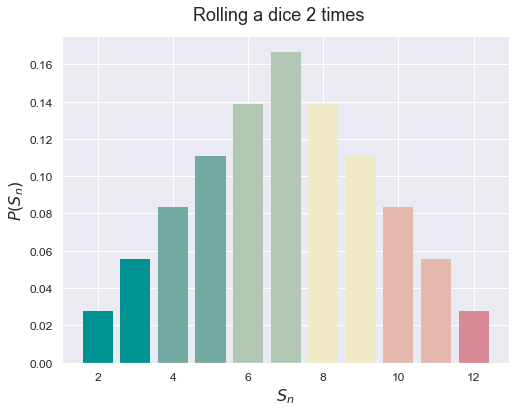

In [584]:
fig = figure_dices(n = 2, fsize = (8, 6), fs = 18)

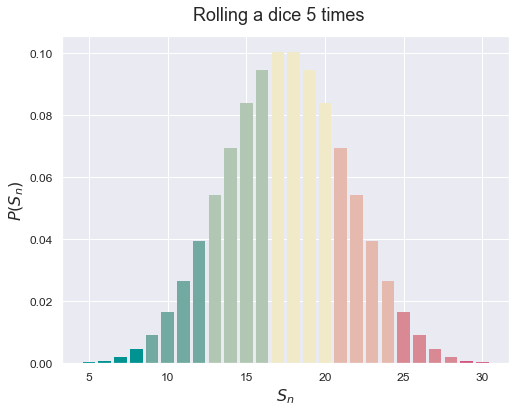

In [585]:
fig = figure_dices(n = 5, fsize = (8, 6), fs = 18)

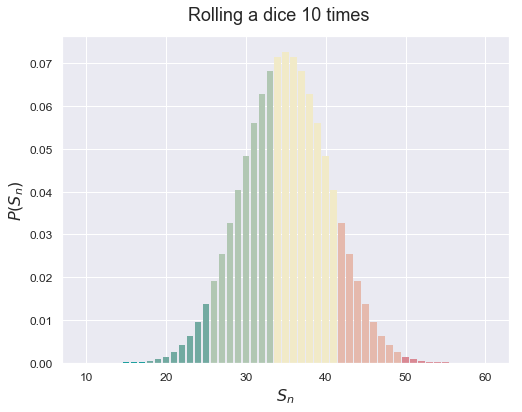

In [586]:
fig = figure_dices(n = 10, fsize = (8, 6), fs = 18)

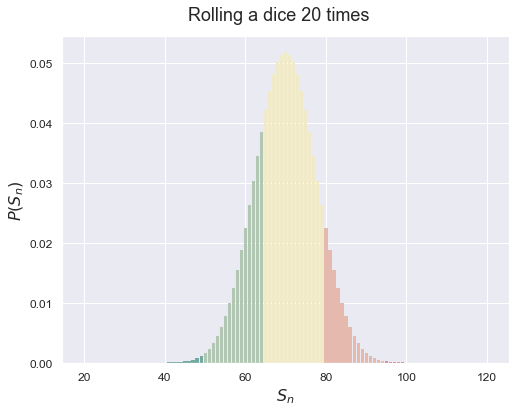

In [587]:
fig = figure_dices(n = 20, fsize = (8, 6), fs = 18)

In [123]:
def convolution(dist_1, dist_2, interval):
    '''
    dist_1: the first distribution
    dist_2: the second distribution
    interval: [a, b]
    '''
    
    # In the standard form, the distribution is uniform on [0, 1]. 
    # Using the parameters loc and scale, one obtains the uniform distribution on [loc, loc + scale].
    uniform_dist = uniform(loc = 0, scale = 1)
    # The scale keyword is equal to 1/lambda
    expon_dist = expon(scale = 1)
    # The location (loc) keyword specifies the mean. 
    # The scale (scale) keyword specifies the standard deviation.
    normal_dist = norm(loc = 0, scale = 1)
    
    dict_dist = {'uniform': uniform_dist, 'exponential': expon_dist, 'normal': normal_dist}
    
    
    delta = 1e-4
    grid = np.arange(interval[0], interval[1], delta)
    
    # probability mass function
    pmf1 = dict_dist[dist_1].pdf(grid)*delta
    #print("Sum of pmf 1: " + str(sum(pmf1)))

    pmf2 = dict_dist[dist_2].pdf(grid)*delta
    #print("Sum of pmf 2: " + str(sum(pmf2)))
    
    # convolution
    pmf3 = signal.fftconvolve(pmf1, pmf2, mode = 'full')
    #print("Sum of the convoluted pmf: " + str(sum(pmf3)))
    

    grid = np.arange(2*interval[0], 2*interval[1], delta)
    
    # probability mass function
    pmf1 = dict_dist[dist_1].pdf(grid)*delta
    #print("Sum of pmf 1: " + str(sum(pmf1)))

    pmf2 = dict_dist[dist_2].pdf(grid)*delta
    #print("Sum of pmf 2: " + str(sum(pmf2)))
    
    pdf1 = pmf1/delta 
    pdf2 = pmf2/delta
    pdf3 = pmf3/delta
    #print("Integration of the convoluted pdf: " + str(np.trapz(pdf3, grid)))
    
    return grid, pdf1, pdf2, pdf3
    

In [169]:
def figure_convolution(dist_1, dist_2, interval, fsize, fs):

    '''
    dist_1: the first distribution
    dist_2: the second distribution
    interval: [a, b]
    fsize: figure size
    fs: font size
    '''
        
    grid, pdf1, pdf2, pdf3 = convolution(dist_1, dist_2, interval)
    
    
    fig = plt.figure(figsize = fsize)
    ax = plt.subplot(111)
    
    ax.plot(grid, pdf1, label = dist_1, linewidth = 3)
    ax.fill_between(grid, pdf1, label = None, alpha = 0.1)
    ax.plot(grid, pdf2, label = dist_2, linewidth = 3)
    ax.fill_between(grid, pdf2, label = None, alpha = 0.1)
    
    length = min(len(grid), len(pdf3))
    ax.plot(grid[:length], pdf3[:length], label = 'sum', linewidth = 3)
    ax.fill_between(grid[:length], pdf3[:length], label = None, alpha = 0.1)
    ax.legend(loc='upper right', fancybox = True, ncol = 1, fontsize = fs - 4)
    ax.set_xlabel(r'$x$', fontsize = fs - 2)
    ax.set_ylabel(r'$f(x)$', fontsize = fs - 2)
    plt.xticks(fontsize = fs - 6)
    plt.yticks(fontsize = fs - 6)
    fig.suptitle('Sum of continuous random variables', fontsize = fs, y = 0.95)
    fig.savefig(_Figure_PATH_ + 'convolution_' + dist_1 + '_' + dist_2 + '.png', dpi = 400, bbox_inches='tight')
    plt.show()

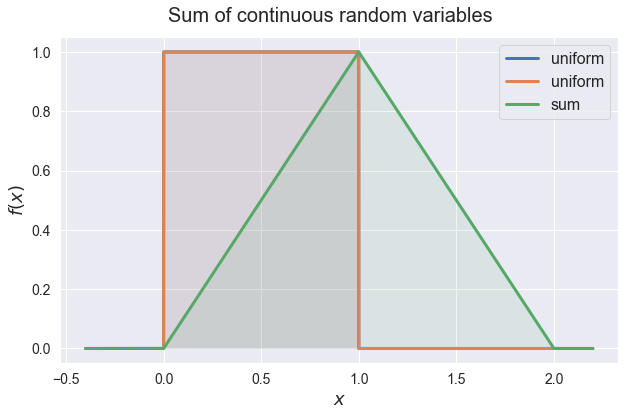

In [170]:
figure_convolution(dist_1 = 'uniform', dist_2 = 'uniform', interval = [-0.2, 1.1], fsize = (10, 6), fs = 20)

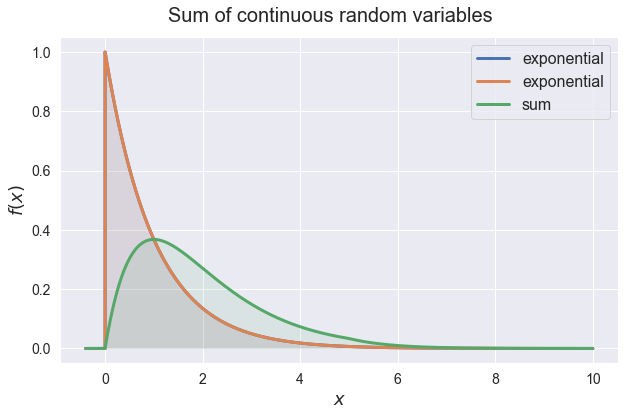

In [171]:
figure_convolution(dist_1 = 'exponential', dist_2 = 'exponential', interval = [-0.2, 5], fsize = (10, 6), fs = 20)

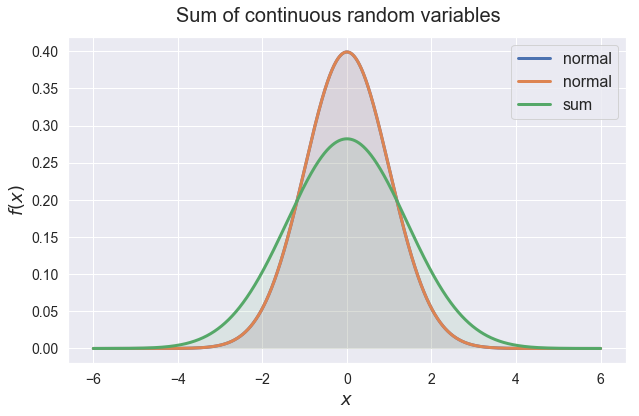

In [172]:
figure_convolution(dist_1 = 'normal', dist_2 = 'normal', interval = [-3, 3], fsize = (10, 6), fs = 20)

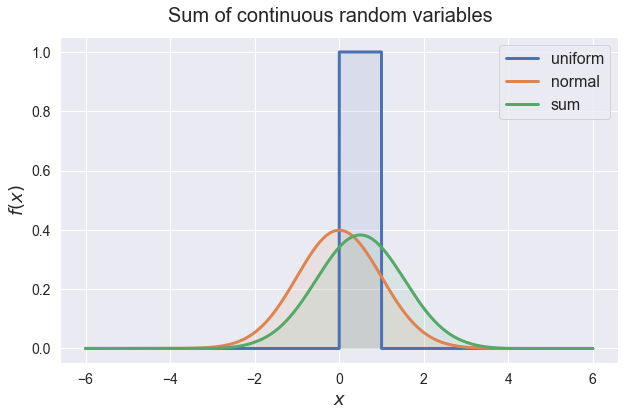

In [173]:
figure_convolution(dist_1 = 'uniform', dist_2 = 'normal', interval = [-3, 3], fsize = (10, 6), fs = 20)